In [759]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

import matplotlib.pyplot as plt

In [874]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 6, input_shape = (None, 5), activation = 'relu'),
    Dense(units = 12, activation = 'relu'),
    Dense(units = 18, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dense(units = 30, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dense(units = 18, activation = 'relu'),
    Dense(units = 12, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [875]:
# Layer summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, None, 6)           36        
_________________________________________________________________
dense_121 (Dense)            (None, None, 12)          84        
_________________________________________________________________
dense_122 (Dense)            (None, None, 18)          234       
_________________________________________________________________
dense_123 (Dense)            (None, None, 24)          456       
_________________________________________________________________
dense_124 (Dense)            (None, None, 30)          750       
_________________________________________________________________
dense_125 (Dense)            (None, None, 24)          744       
_________________________________________________________________
dense_126 (Dense)            (None, None, 18)        

In [876]:
# Compile model
model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [877]:
# Cochise county model
coconino = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/coconino.csv")

In [878]:
coconino['flagstaff_hmi'] = pd.cut(coconino.flagstaff_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])

In [879]:
coconino

,date,flagstaff_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,10434,6660.4,116717,15.0,7303000
1,2001,0,11375,6848.8,117803,15.0,8545000
2,2002,0,11638,7717.6,120390,15.0,11246000
3,2003,1,12876,7502.3,121545,15.0,11981000
4,2004,1,14102,6702.4,123349,16.0,8545000
5,2005,1,12666,6972.5,124804,18.0,8545000
6,2006,1,13067,6586.8,126029,16.8,11981000
7,2007,1,11691,6099.8,127451,16.2,14844000
8,2008,1,12442,5838.6,128426,16.0,12448000
9,2009,1,10494,5183.9,129849,18.0,14844000


In [880]:
coconino['flagstaff_hmi'] = coconino['flagstaff_hmi'].astype(int)

In [882]:
# Get X and y
X = coconino.iloc[:, 2:].values
Y = coconino.flagstaff_hmi.values

In [883]:
### Splitting training and test
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [884]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 100, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/100
3/3 - 0s - loss: 17730.3418 - accuracy: 0.1364 - val_loss: 3505.8931 - val_accuracy: 0.1364
Epoch 2/100
3/3 - 0s - loss: 14365.2744 - accuracy: 0.1364 - val_loss: 2792.5520 - val_accuracy: 0.1364
Epoch 3/100
3/3 - 0s - loss: 11295.5098 - accuracy: 0.1364 - val_loss: 2130.8799 - val_accuracy: 0.1364
Epoch 4/100
3/3 - 0s - loss: 8520.7207 - accuracy: 0.1364 - val_loss: 1567.3562 - val_accuracy: 0.1364
Epoch 5/100
3/3 - 0s - loss: 6263.2612 - accuracy: 0.1364 - val_loss: 1117.2064 - val_accuracy: 0.1364
Epoch 6/100
3/3 - 0s - loss: 4408.5493 - accuracy: 0.1364 - val_loss: 646.4586 - val_accuracy: 0.1364
Epoch 7/100
3/3 - 0s - loss: 2278.2185 - accuracy: 0.1364 - val_loss: 162.4373 - val_accuracy: 0.1364
Epoch 8/100
3/3 - 0s - loss: 281.3134 - accuracy: 0.6818 - val_loss: 43.2150 - val_accuracy: 0.8636
Epoch 9/100
3/3 - 0s - loss: 158.2976 - accuracy: 0.8636 - val_loss: 84.5435 - val_accuracy: 0.8636
Epoch 10/100
3/3 - 0s - loss: 219.1338 - accuracy: 0.8636 - val_loss: 112.3464

Epoch 77/100
3/3 - 0s - loss: 34.7524 - accuracy: 0.8636 - val_loss: 17.8425 - val_accuracy: 0.8636
Epoch 78/100
3/3 - 0s - loss: 42.0812 - accuracy: 0.8636 - val_loss: 16.7981 - val_accuracy: 0.8636
Epoch 79/100
3/3 - 0s - loss: 37.1967 - accuracy: 0.8636 - val_loss: 10.4341 - val_accuracy: 0.8636
Epoch 80/100
3/3 - 0s - loss: 18.2715 - accuracy: 0.8636 - val_loss: 2.9175 - val_accuracy: 0.8636
Epoch 81/100
3/3 - 0s - loss: 16.7857 - accuracy: 0.5000 - val_loss: 2.8652 - val_accuracy: 0.8636
Epoch 82/100
3/3 - 0s - loss: 7.3244 - accuracy: 0.8636 - val_loss: 4.9790 - val_accuracy: 0.8636
Epoch 83/100
3/3 - 0s - loss: 12.6095 - accuracy: 0.8636 - val_loss: 4.5632 - val_accuracy: 0.8636
Epoch 84/100
3/3 - 0s - loss: 9.4953 - accuracy: 0.8636 - val_loss: 1.4630 - val_accuracy: 0.8636
Epoch 85/100
3/3 - 0s - loss: 4.3888 - accuracy: 0.7727 - val_loss: 0.8057 - val_accuracy: 0.8636
Epoch 86/100
3/3 - 0s - loss: 4.2092 - accuracy: 0.8636 - val_loss: 4.5243 - val_accuracy: 0.8636
Epoch 87/10

In [885]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 86.36


In [886]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

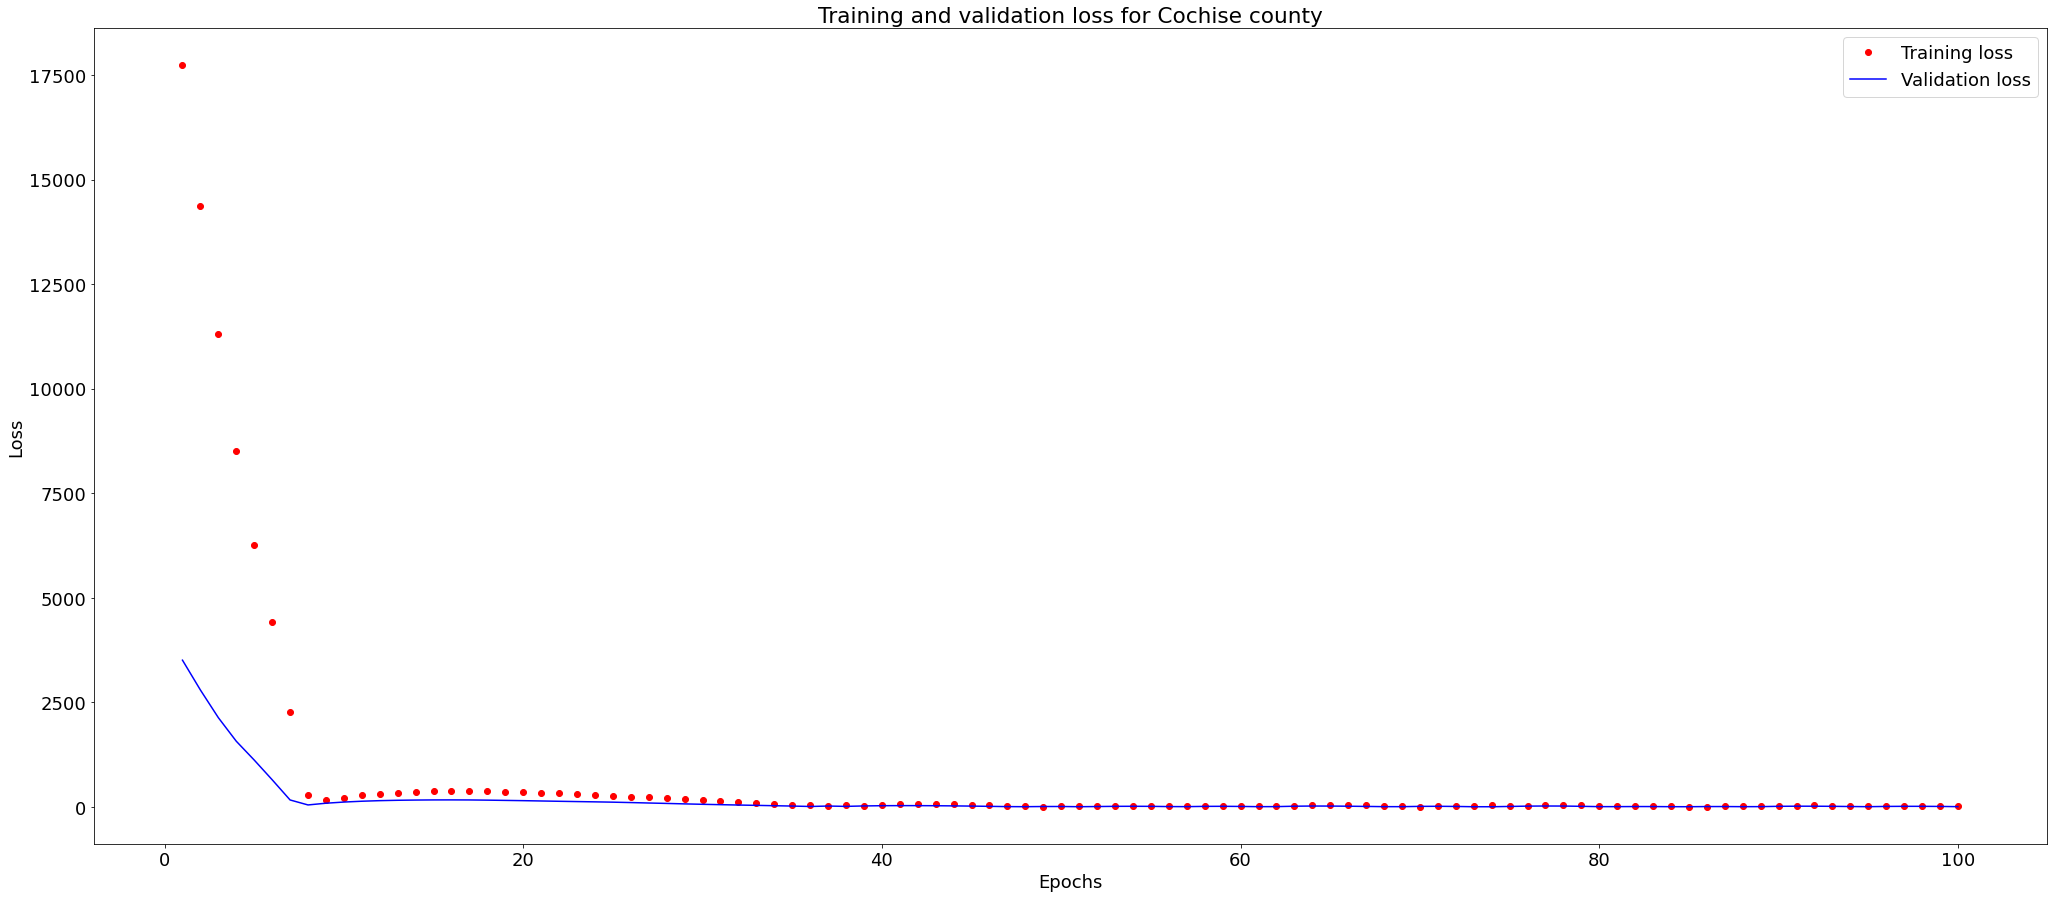

In [887]:
### Cochise training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Cochise county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

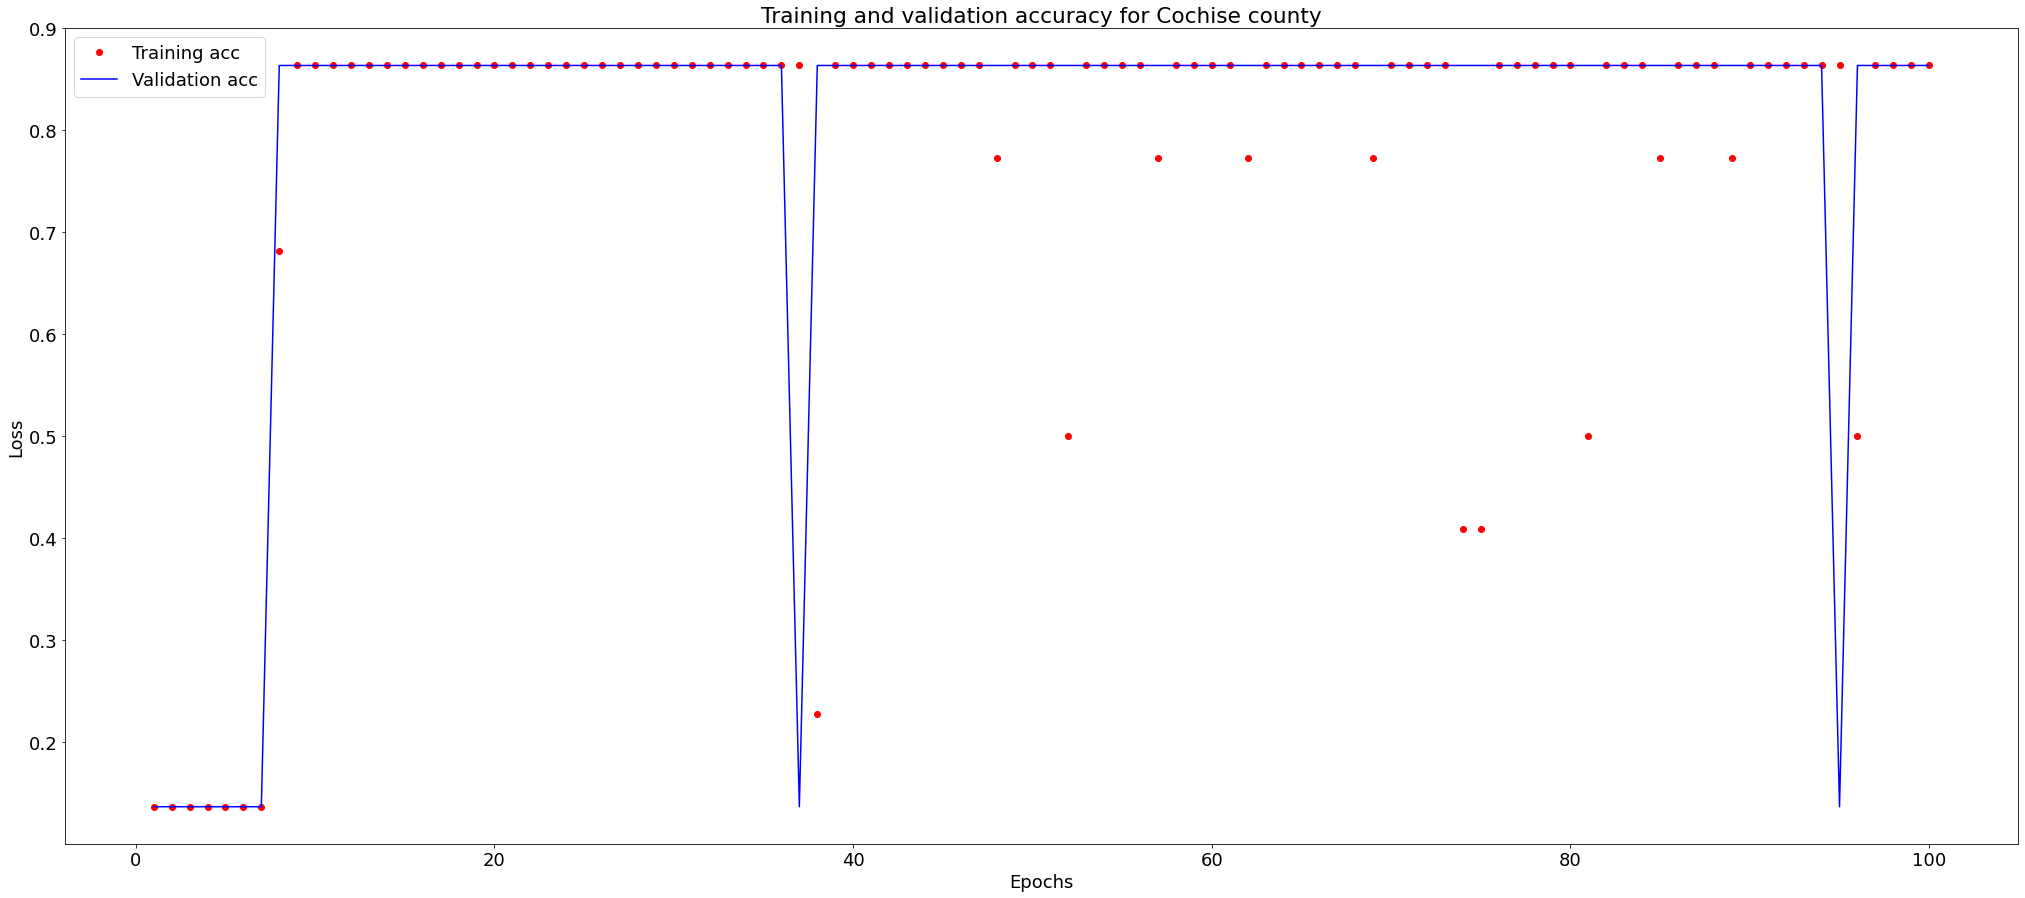

In [888]:
### Cochise training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Cochise county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [889]:
# Gila county model
gila = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/gila.csv")

In [890]:
gila['payson_hmi'] = pd.cut(gila.payson_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])

In [891]:
gila

,date,payson_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,3840,4443.4,51355,17.0,14919000
1,2001,0,5406,4280.4,51165,17.0,18905000
2,2002,0,4492,4564.5,51225,17.0,23779000
3,2003,0,3845,4347.7,50906,17.0,25343000
4,2004,0,4074,4266.2,50848,18.0,27391000
5,2005,0,4205,4368.8,50914,19.0,22202000
6,2006,0,4174,4023.3,51635,20.0,27391000
7,2007,0,3849,3216.0,52231,18.2,24820000
8,2008,0,4565,3603.5,52273,16.0,18905000
9,2009,0,4519,5604.3,52199,20.7,27391000


In [892]:
gila['payson_hmi'] = gila['payson_hmi'].astype(int)

In [893]:
# Get X and y
X = gila.iloc[:, 2:].values
Y = gila.payson_hmi.values

In [894]:
### Splitting training and test
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [895]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 100, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/100
3/3 - 0s - loss: 64.7629 - accuracy: 0.5455 - val_loss: 19.6707 - val_accuracy: 0.8182
Epoch 2/100
3/3 - 0s - loss: 126.2151 - accuracy: 0.8182 - val_loss: 19.3050 - val_accuracy: 0.8182
Epoch 3/100
3/3 - 0s - loss: 69.0890 - accuracy: 0.8182 - val_loss: 14.0980 - val_accuracy: 0.1818
Epoch 4/100
3/3 - 0s - loss: 106.0306 - accuracy: 0.1818 - val_loss: 4.9876 - val_accuracy: 0.8182
Epoch 5/100
3/3 - 0s - loss: 25.6266 - accuracy: 0.8182 - val_loss: 1.2776 - val_accuracy: 0.8182
Epoch 6/100
3/3 - 0s - loss: 27.2840 - accuracy: 0.5455 - val_loss: 6.3350 - val_accuracy: 0.8182
Epoch 7/100
3/3 - 0s - loss: 34.5841 - accuracy: 0.8182 - val_loss: 7.1363 - val_accuracy: 0.8182
Epoch 8/100
3/3 - 0s - loss: 32.1806 - accuracy: 0.8182 - val_loss: 12.0367 - val_accuracy: 0.1818
Epoch 9/100
3/3 - 0s - loss: 32.5845 - accuracy: 0.2727 - val_loss: 18.3720 - val_accuracy: 0.8182
Epoch 10/100
3/3 - 0s - loss: 115.0732 - accuracy: 0.8182 - val_loss: 32.2882 - val_accuracy: 0.8182
Epoch 11/1

Epoch 84/100
3/3 - 0s - loss: 155.9499 - accuracy: 0.8182 - val_loss: 27.7516 - val_accuracy: 0.8182
Epoch 85/100
3/3 - 0s - loss: 130.9419 - accuracy: 0.8182 - val_loss: 11.9849 - val_accuracy: 0.8182
Epoch 86/100
3/3 - 0s - loss: 40.8465 - accuracy: 0.7273 - val_loss: 19.6666 - val_accuracy: 0.1818
Epoch 87/100
3/3 - 0s - loss: 71.4585 - accuracy: 0.4545 - val_loss: 13.3472 - val_accuracy: 0.8182
Epoch 88/100
3/3 - 0s - loss: 76.7713 - accuracy: 0.8182 - val_loss: 17.6967 - val_accuracy: 0.8182
Epoch 89/100
3/3 - 0s - loss: 96.9208 - accuracy: 0.8182 - val_loss: 11.8261 - val_accuracy: 0.8182
Epoch 90/100
3/3 - 0s - loss: 30.2214 - accuracy: 0.8182 - val_loss: 14.1960 - val_accuracy: 0.1818
Epoch 91/100
3/3 - 0s - loss: 38.2526 - accuracy: 0.5455 - val_loss: 4.2851 - val_accuracy: 0.8182
Epoch 92/100
3/3 - 0s - loss: 22.8104 - accuracy: 0.8182 - val_loss: 2.6065 - val_accuracy: 0.1818
Epoch 93/100
3/3 - 0s - loss: 6.7125 - accuracy: 0.6364 - val_loss: 2.9361 - val_accuracy: 0.8182
Ep

In [896]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 81.82


In [897]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [898]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

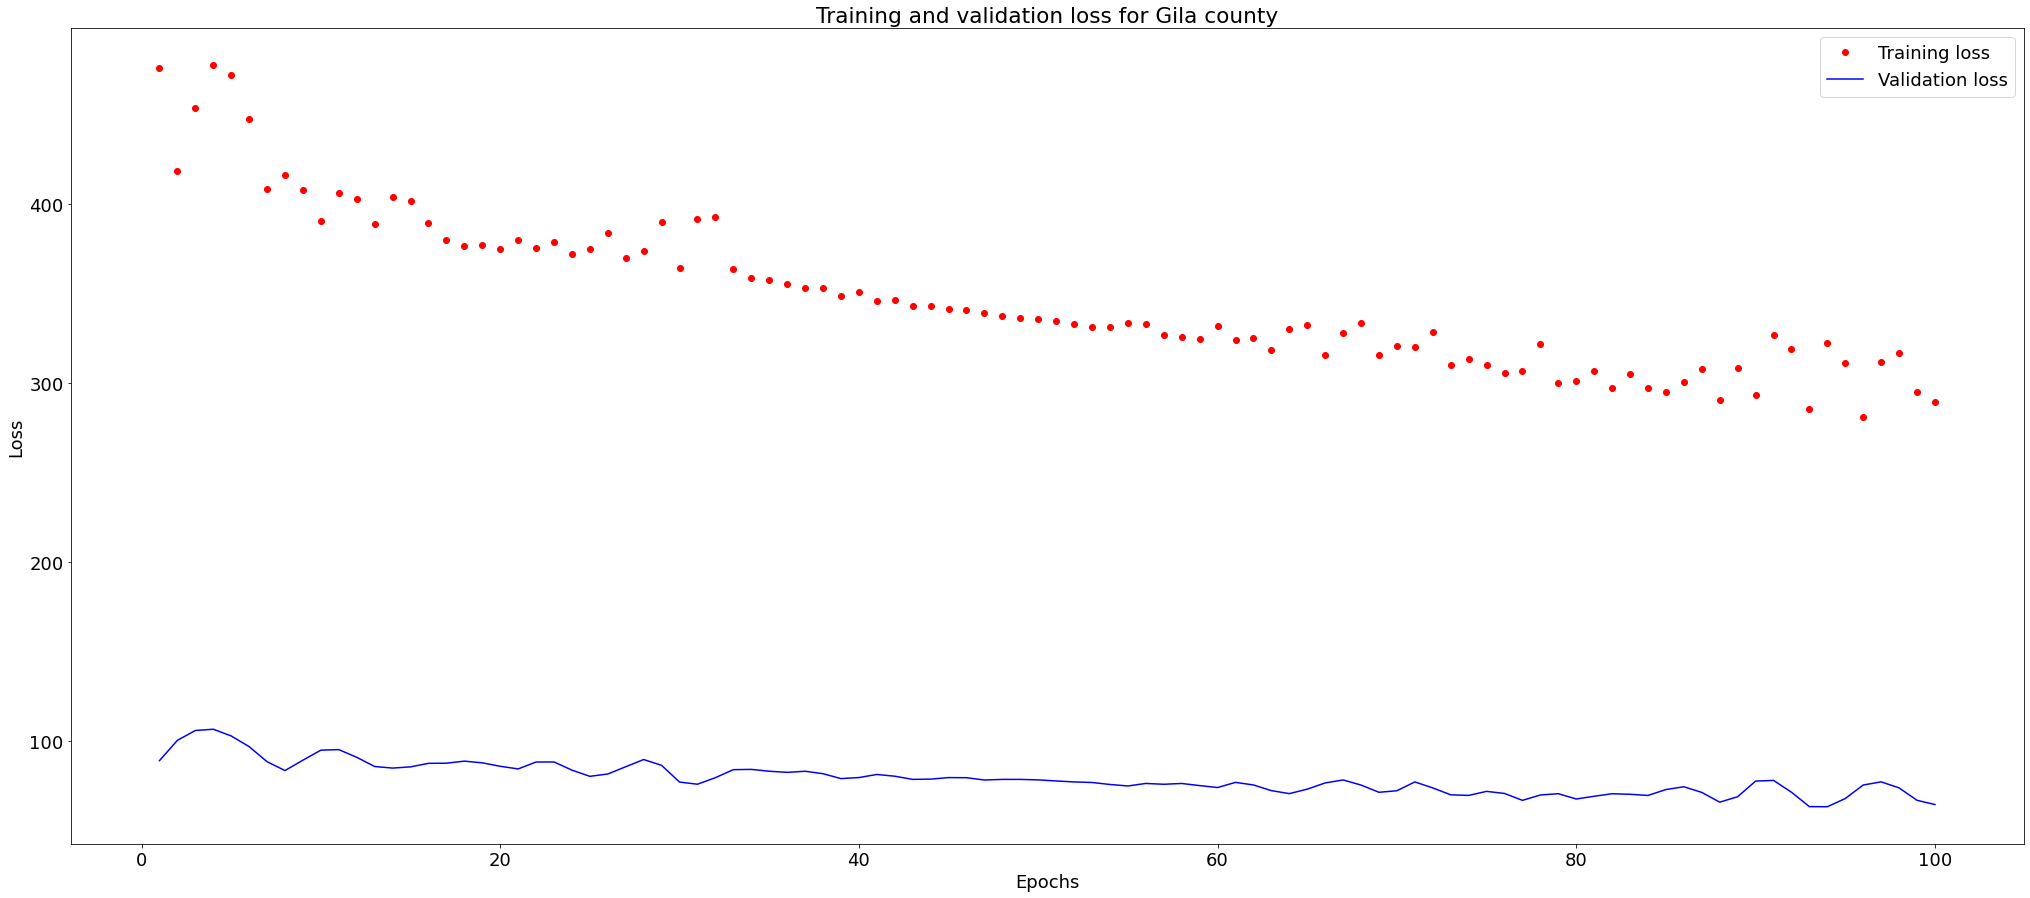

In [784]:
### Gila training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Gila county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

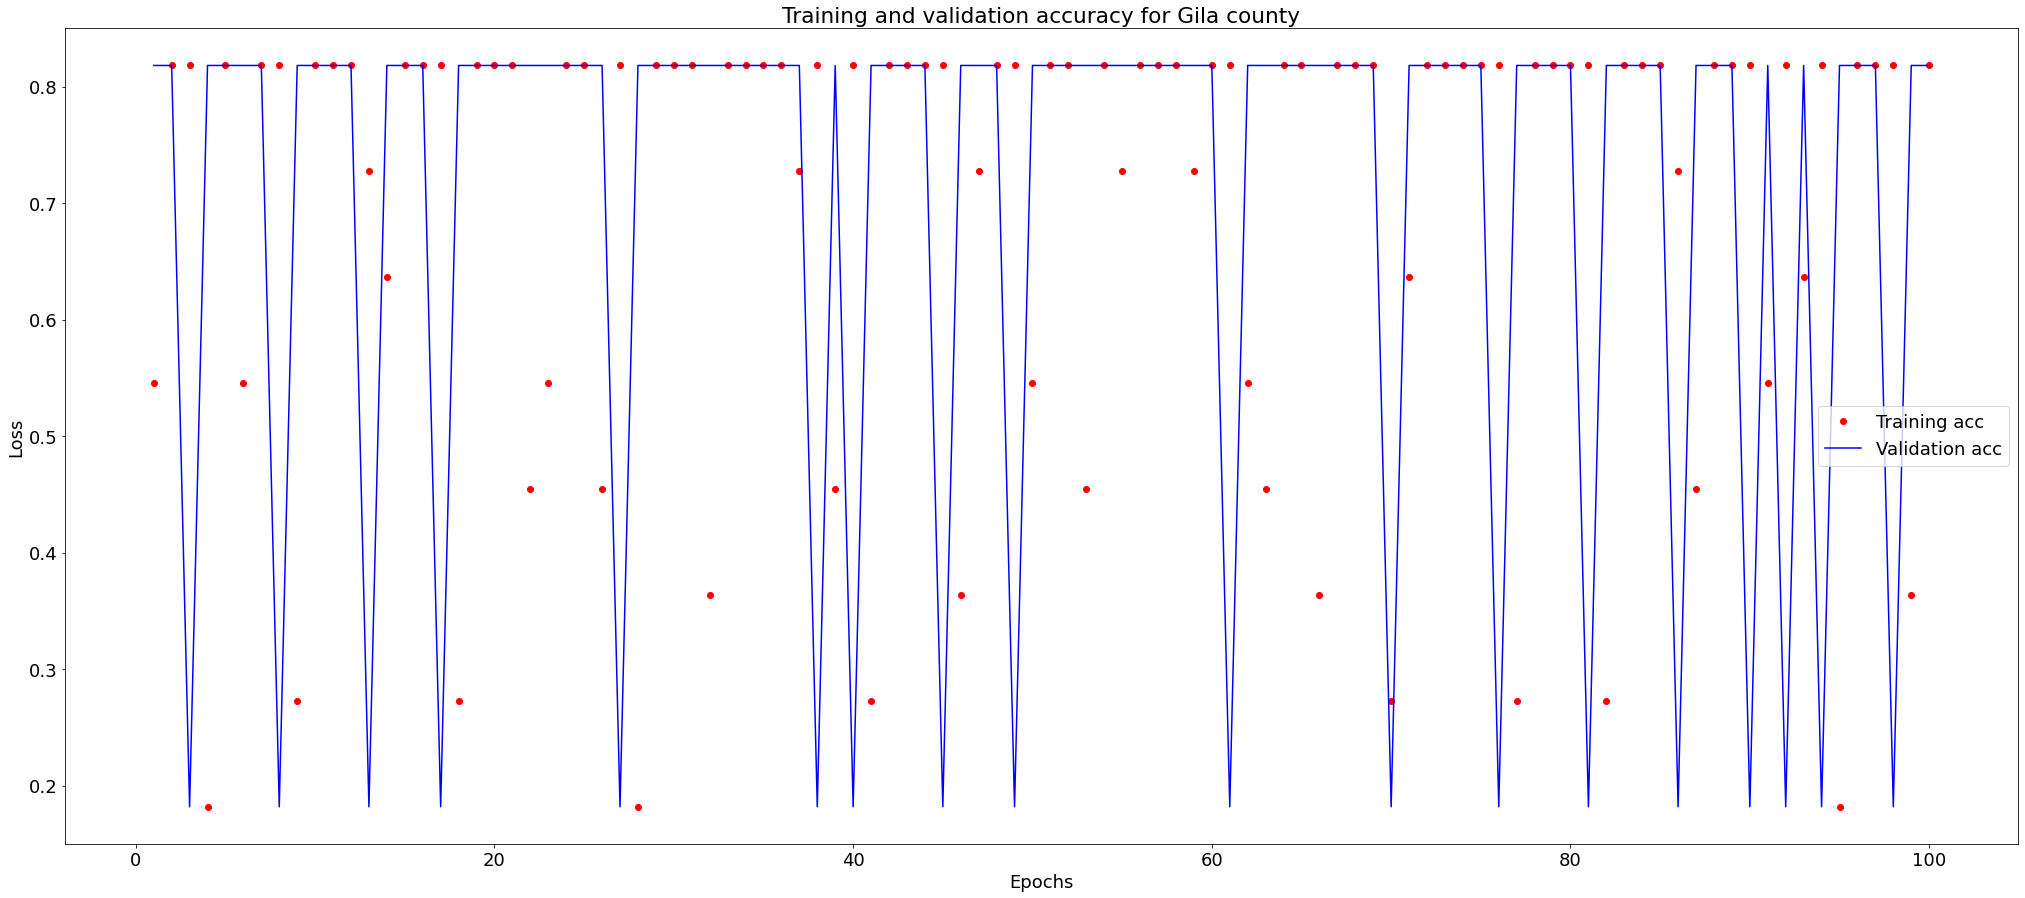

In [899]:
### Gila training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Gila county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [900]:
# Graham county model
graham = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/graham.csv")

In [901]:
graham['safford_hmi'] = pd.cut(graham.safford_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])

In [902]:
graham

,date,safford_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,1563,2445.6,33541,21.0,4396000
1,2001,0,1461,2421.9,33307,22.0,2596000
2,2002,0,1378,2428.7,33120,22.0,4792000
3,2003,0,1354,2537.2,32785,20.0,2415000
4,2004,0,1286,2134.3,32441,22.0,3691000
5,2005,0,670,1146.1,32629,23.0,4396000
6,2006,0,757,2096.9,33286,23.4,3707000
7,2007,0,850,1588.2,34736,22.4,4835000
8,2008,0,1180,2136.9,36204,21.0,2415000
9,2009,0,1369,4777.7,37045,21.5,2596000


In [903]:
graham['safford_hmi'] = graham['safford_hmi'].astype(int)

In [905]:
# Get X and y
X = graham.iloc[:, 2:].values
Y = graham.safford_hmi.values

In [906]:
### Splitting training and test
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [907]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 100, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/100
3/3 - 0s - loss: 0.3403 - accuracy: 0.9545 - val_loss: 4.4179 - val_accuracy: 0.0455
Epoch 2/100
3/3 - 0s - loss: 3.5236 - accuracy: 0.1364 - val_loss: 0.4478 - val_accuracy: 0.9545
Epoch 3/100
3/3 - 0s - loss: 0.4478 - accuracy: 0.9545 - val_loss: 1.0371 - val_accuracy: 0.9545
Epoch 4/100
3/3 - 0s - loss: 1.1960 - accuracy: 0.9545 - val_loss: 1.4380 - val_accuracy: 0.9545
Epoch 5/100
3/3 - 0s - loss: 1.4380 - accuracy: 0.9545 - val_loss: 1.6749 - val_accuracy: 0.9545
Epoch 6/100
3/3 - 0s - loss: 1.7389 - accuracy: 0.9545 - val_loss: 1.8179 - val_accuracy: 0.9545
Epoch 7/100
3/3 - 0s - loss: 1.8180 - accuracy: 0.9545 - val_loss: 1.8660 - val_accuracy: 0.9545
Epoch 8/100
3/3 - 0s - loss: 1.8660 - accuracy: 0.9545 - val_loss: 1.8574 - val_accuracy: 0.9545
Epoch 9/100
3/3 - 0s - loss: 1.8574 - accuracy: 0.9545 - val_loss: 1.8074 - val_accuracy: 0.9545
Epoch 10/100
3/3 - 0s - loss: 1.8074 - accuracy: 0.9545 - val_loss: 1.7268 - val_accuracy: 0.9545
Epoch 11/100
3/3 - 0s - loss:

Epoch 83/100
3/3 - 0s - loss: 0.3167 - accuracy: 0.9545 - val_loss: 0.1617 - val_accuracy: 0.9545
Epoch 84/100
3/3 - 0s - loss: 0.1557 - accuracy: 0.9545 - val_loss: 0.2909 - val_accuracy: 0.9545
Epoch 85/100
3/3 - 0s - loss: 0.2908 - accuracy: 0.9545 - val_loss: 0.3428 - val_accuracy: 0.9545
Epoch 86/100
3/3 - 0s - loss: 0.3429 - accuracy: 0.9545 - val_loss: 0.3269 - val_accuracy: 0.9545
Epoch 87/100
3/3 - 0s - loss: 0.3188 - accuracy: 0.9545 - val_loss: 0.2174 - val_accuracy: 0.9545
Epoch 88/100
3/3 - 0s - loss: 0.1671 - accuracy: 0.9545 - val_loss: 0.2920 - val_accuracy: 0.9545
Epoch 89/100
3/3 - 0s - loss: 0.2482 - accuracy: 0.9545 - val_loss: 0.2284 - val_accuracy: 0.9545
Epoch 90/100
3/3 - 0s - loss: 0.2747 - accuracy: 0.9545 - val_loss: 0.3173 - val_accuracy: 0.9545
Epoch 91/100
3/3 - 0s - loss: 0.3360 - accuracy: 0.9545 - val_loss: 0.3295 - val_accuracy: 0.9545
Epoch 92/100
3/3 - 0s - loss: 0.3297 - accuracy: 0.9545 - val_loss: 0.2680 - val_accuracy: 0.9545
Epoch 93/100
3/3 - 0

In [908]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 95.45


In [909]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

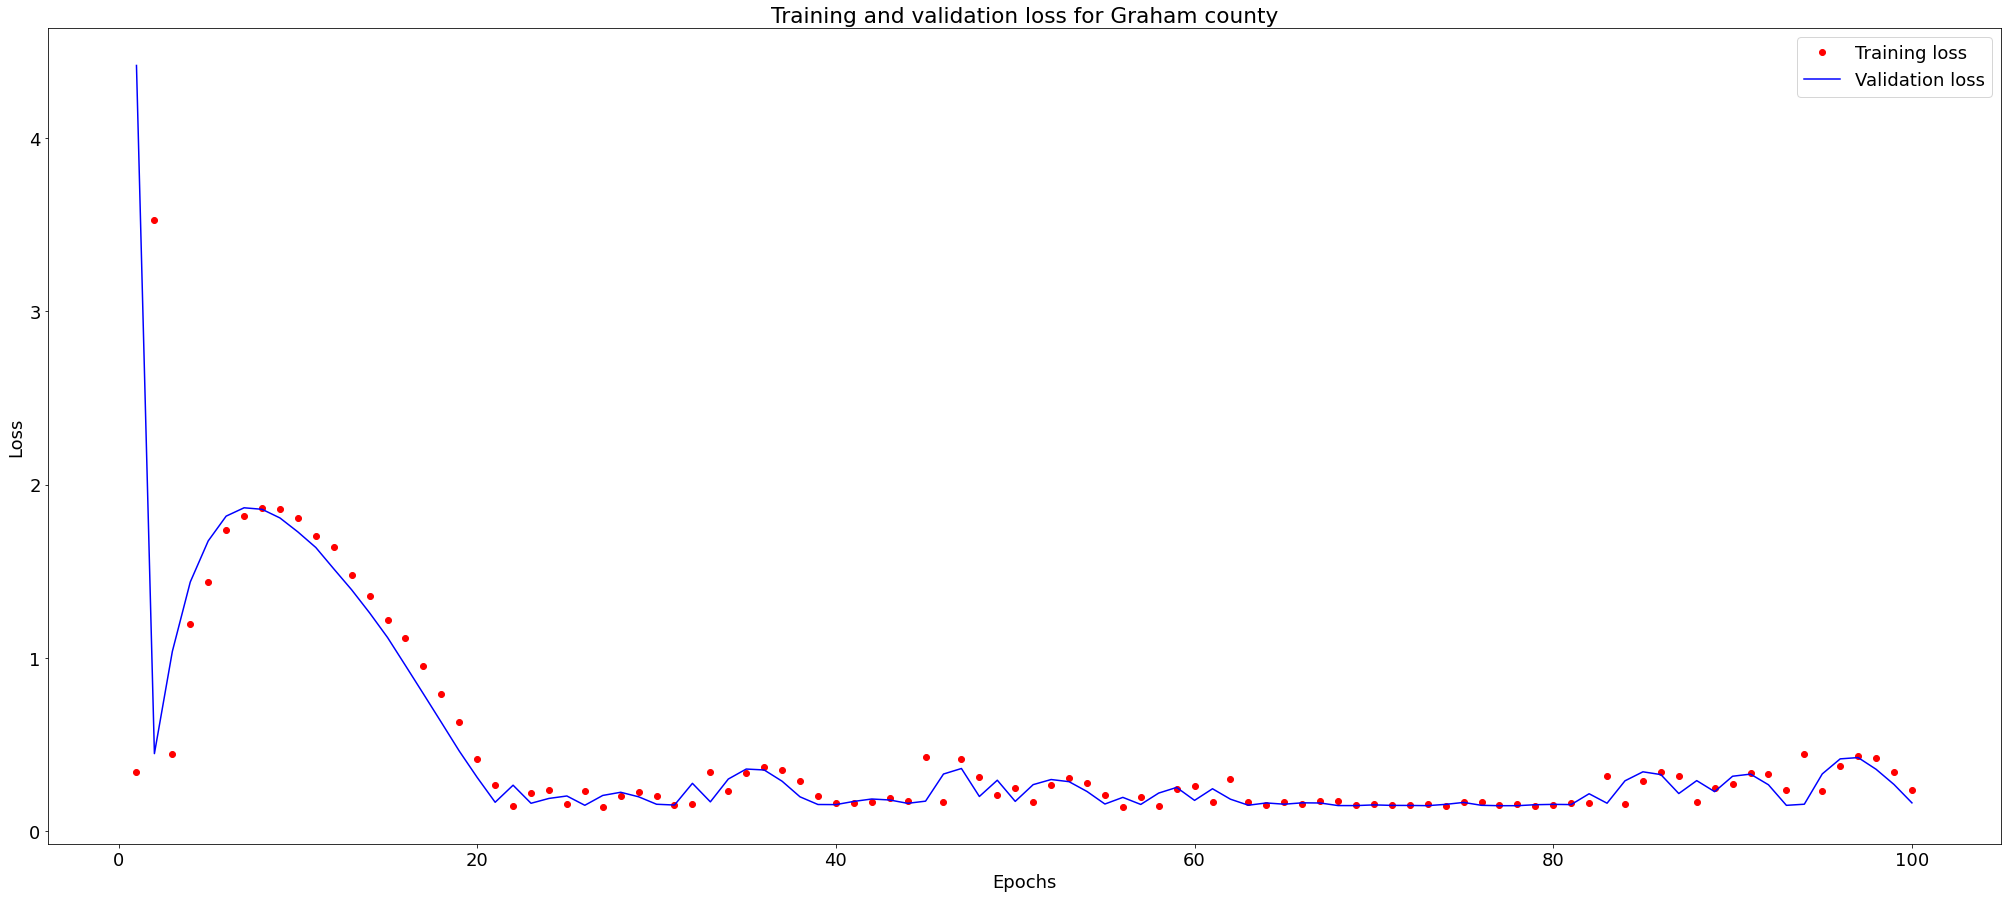

In [910]:
### Graham training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Graham county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

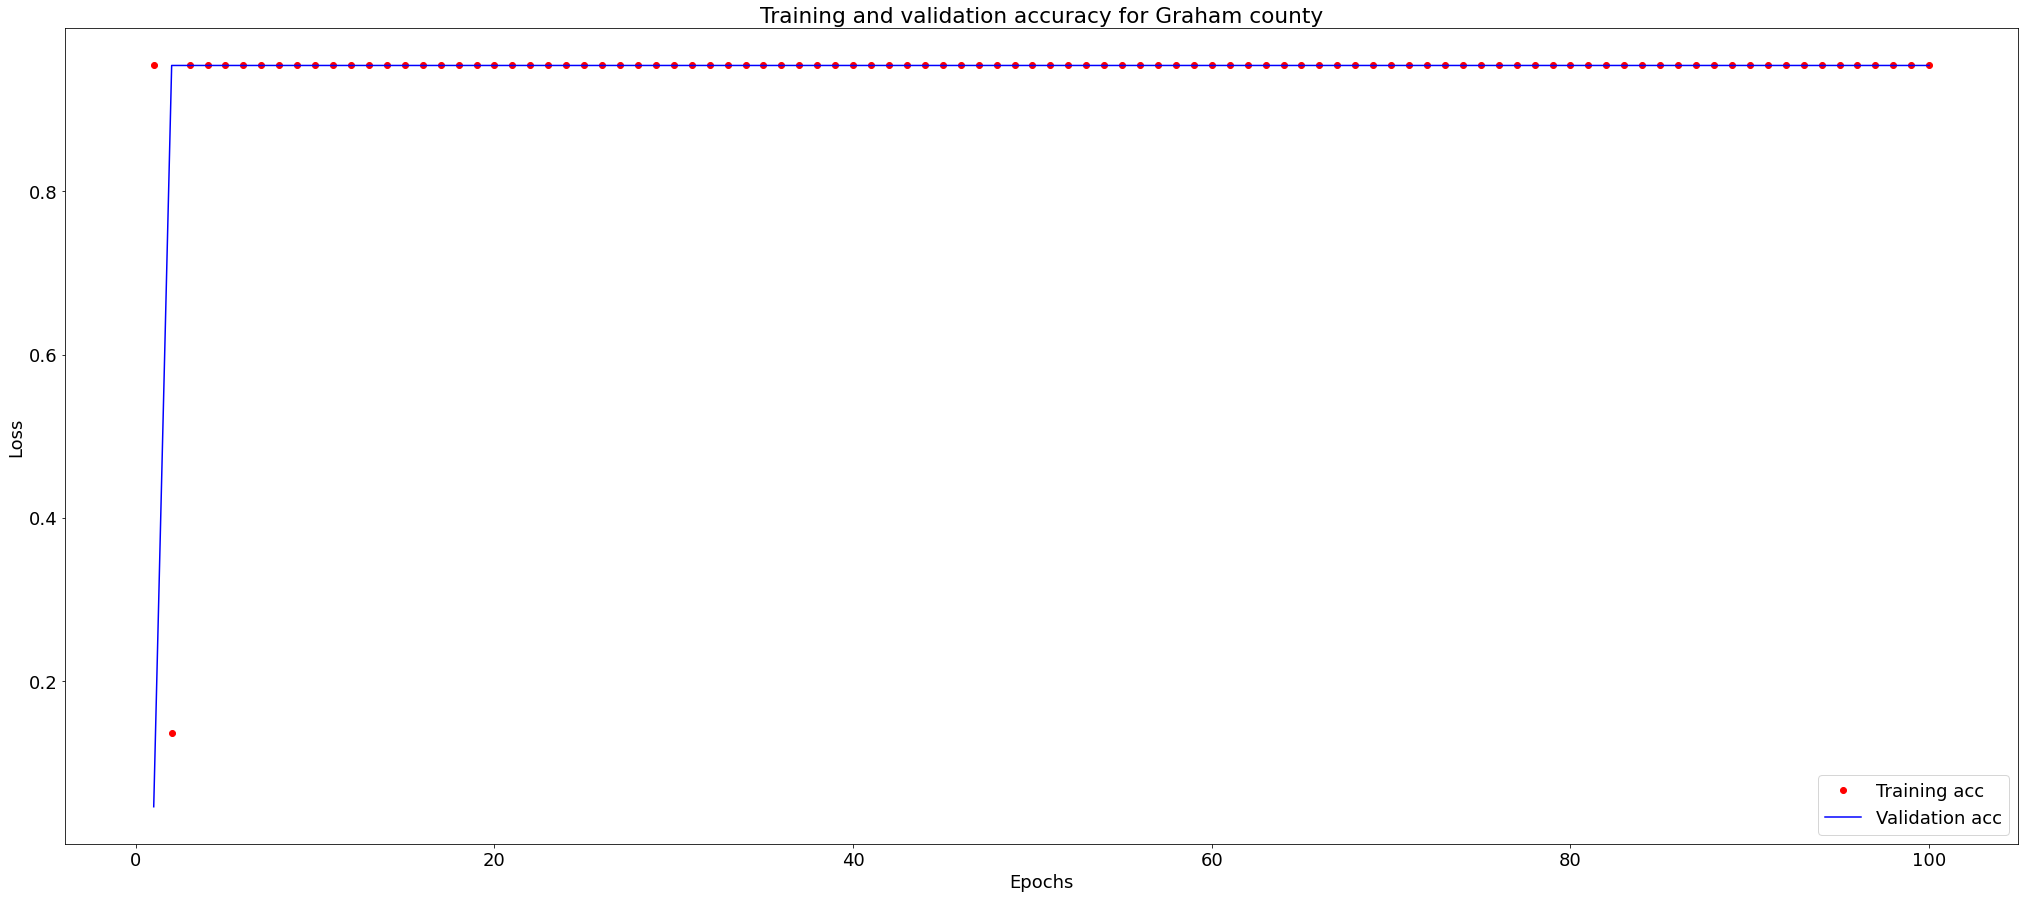

In [911]:
### Graham training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Graham county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [912]:
# Maricopa county model
maricopa = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/maricopa.csv")

In [913]:
maricopa['phoenix_hmi'] = pd.cut(maricopa.phoenix_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])

In [914]:
maricopa

,date,phoenix_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,155480,6167.4,3097378,10.0,384937000
1,2001,0,149496,6183.1,3200075,11.0,528421000
2,2002,0,156126,6402.9,3299127,11.0,442961000
3,2003,0,158182,5867.1,3391391,12.0,475144000
4,2004,0,160559,5507.9,3502635,13.0,528421000
5,2005,1,147950,5080.8,3647131,12.0,554877000
6,2006,1,160996,5098.1,3776118,12.5,604492000
7,2007,1,174332,5079.7,3872962,12.9,554877000
8,2008,1,184138,5004.7,3958263,13.0,510299000
9,2009,0,187775,4457.8,4023132,15.1,564781000


In [915]:
maricopa['phoenix_hmi'] = maricopa['phoenix_hmi'].astype(int)

In [916]:
# Get X and y
X = maricopa.iloc[:, 2:].values
Y = maricopa.phoenix_hmi.values

In [917]:
### Splitting training and test
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [929]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 100, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/100
3/3 - 0s - loss: 2218.3291 - accuracy: 0.4545 - val_loss: 15.0032 - val_accuracy: 0.5455
Epoch 2/100
3/3 - 0s - loss: 3548.0916 - accuracy: 0.5455 - val_loss: 28.9189 - val_accuracy: 0.5455
Epoch 3/100
3/3 - 0s - loss: 3308.7156 - accuracy: 0.5455 - val_loss: 10.2116 - val_accuracy: 0.4545
Epoch 4/100
3/3 - 0s - loss: 2643.8882 - accuracy: 0.4545 - val_loss: 17.1024 - val_accuracy: 0.4545
Epoch 5/100
3/3 - 0s - loss: 993.2493 - accuracy: 0.6364 - val_loss: 15.3293 - val_accuracy: 0.5455
Epoch 6/100
3/3 - 0s - loss: 1883.4410 - accuracy: 0.5455 - val_loss: 11.8594 - val_accuracy: 0.4545
Epoch 7/100
3/3 - 0s - loss: 2392.0012 - accuracy: 0.4545 - val_loss: 1.8169 - val_accuracy: 0.4545
Epoch 8/100
3/3 - 0s - loss: 1422.6614 - accuracy: 0.5455 - val_loss: 39.1977 - val_accuracy: 0.5455
Epoch 9/100
3/3 - 0s - loss: 5687.0522 - accuracy: 0.5455 - val_loss: 31.5695 - val_accuracy: 0.5455
Epoch 10/100
3/3 - 0s - loss: 3294.6221 - accuracy: 0.4545 - val_loss: 2.9738 - val_accuracy:

Epoch 82/100
3/3 - 0s - loss: 1701.8356 - accuracy: 0.5455 - val_loss: 25.1056 - val_accuracy: 0.5455
Epoch 83/100
3/3 - 0s - loss: 3062.4680 - accuracy: 0.5455 - val_loss: 0.7312 - val_accuracy: 0.5455
Epoch 84/100
3/3 - 0s - loss: 1427.2749 - accuracy: 0.6364 - val_loss: 28.8561 - val_accuracy: 0.4545
Epoch 85/100
3/3 - 0s - loss: 2838.2898 - accuracy: 0.4545 - val_loss: 8.5222 - val_accuracy: 0.5455
Epoch 86/100
3/3 - 0s - loss: 1253.3431 - accuracy: 0.5455 - val_loss: 4.4010 - val_accuracy: 0.4545
Epoch 87/100
3/3 - 0s - loss: 759.1049 - accuracy: 0.4545 - val_loss: 10.4365 - val_accuracy: 0.5455
Epoch 88/100
3/3 - 0s - loss: 2169.8167 - accuracy: 0.5455 - val_loss: 12.7222 - val_accuracy: 0.5455
Epoch 89/100
3/3 - 0s - loss: 1014.0637 - accuracy: 0.4545 - val_loss: 0.7631 - val_accuracy: 0.5455
Epoch 90/100
3/3 - 0s - loss: 190.2524 - accuracy: 0.5455 - val_loss: 0.8701 - val_accuracy: 0.5455
Epoch 91/100
3/3 - 0s - loss: 255.7641 - accuracy: 0.4545 - val_loss: 12.8096 - val_accur

In [918]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 45.45


In [919]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

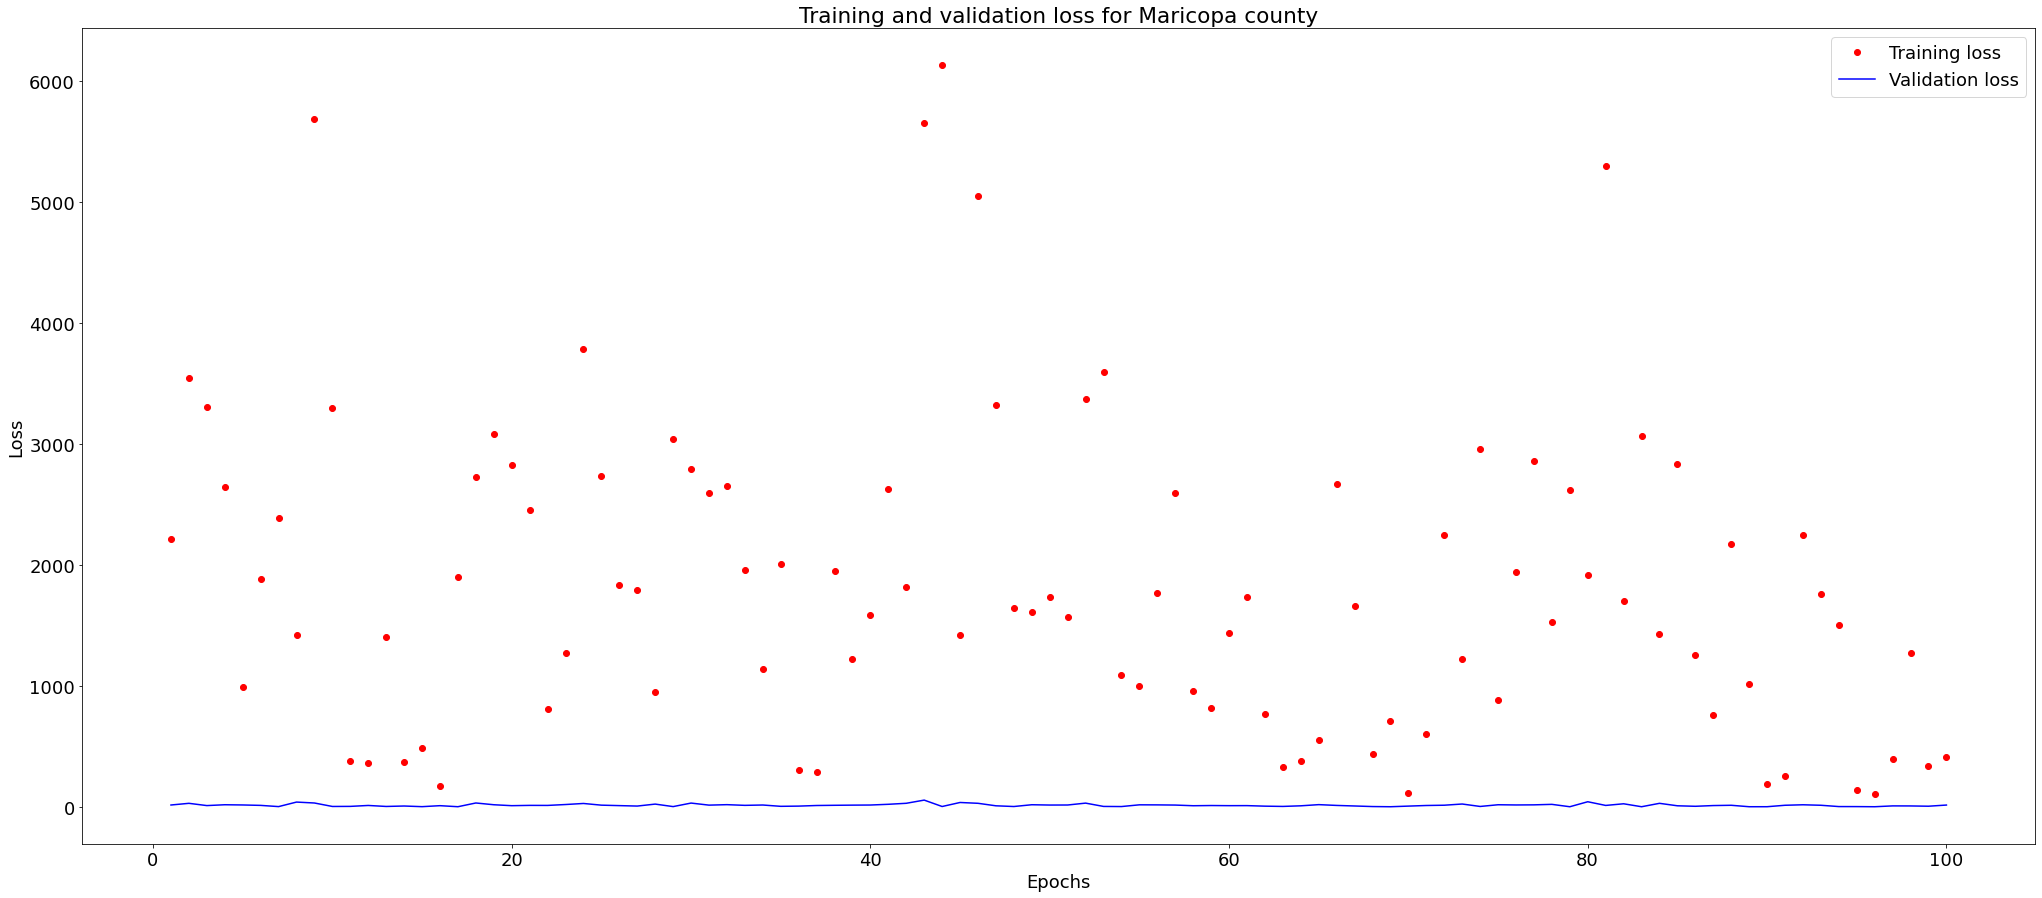

In [930]:
### Maricopa training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Maricopa county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

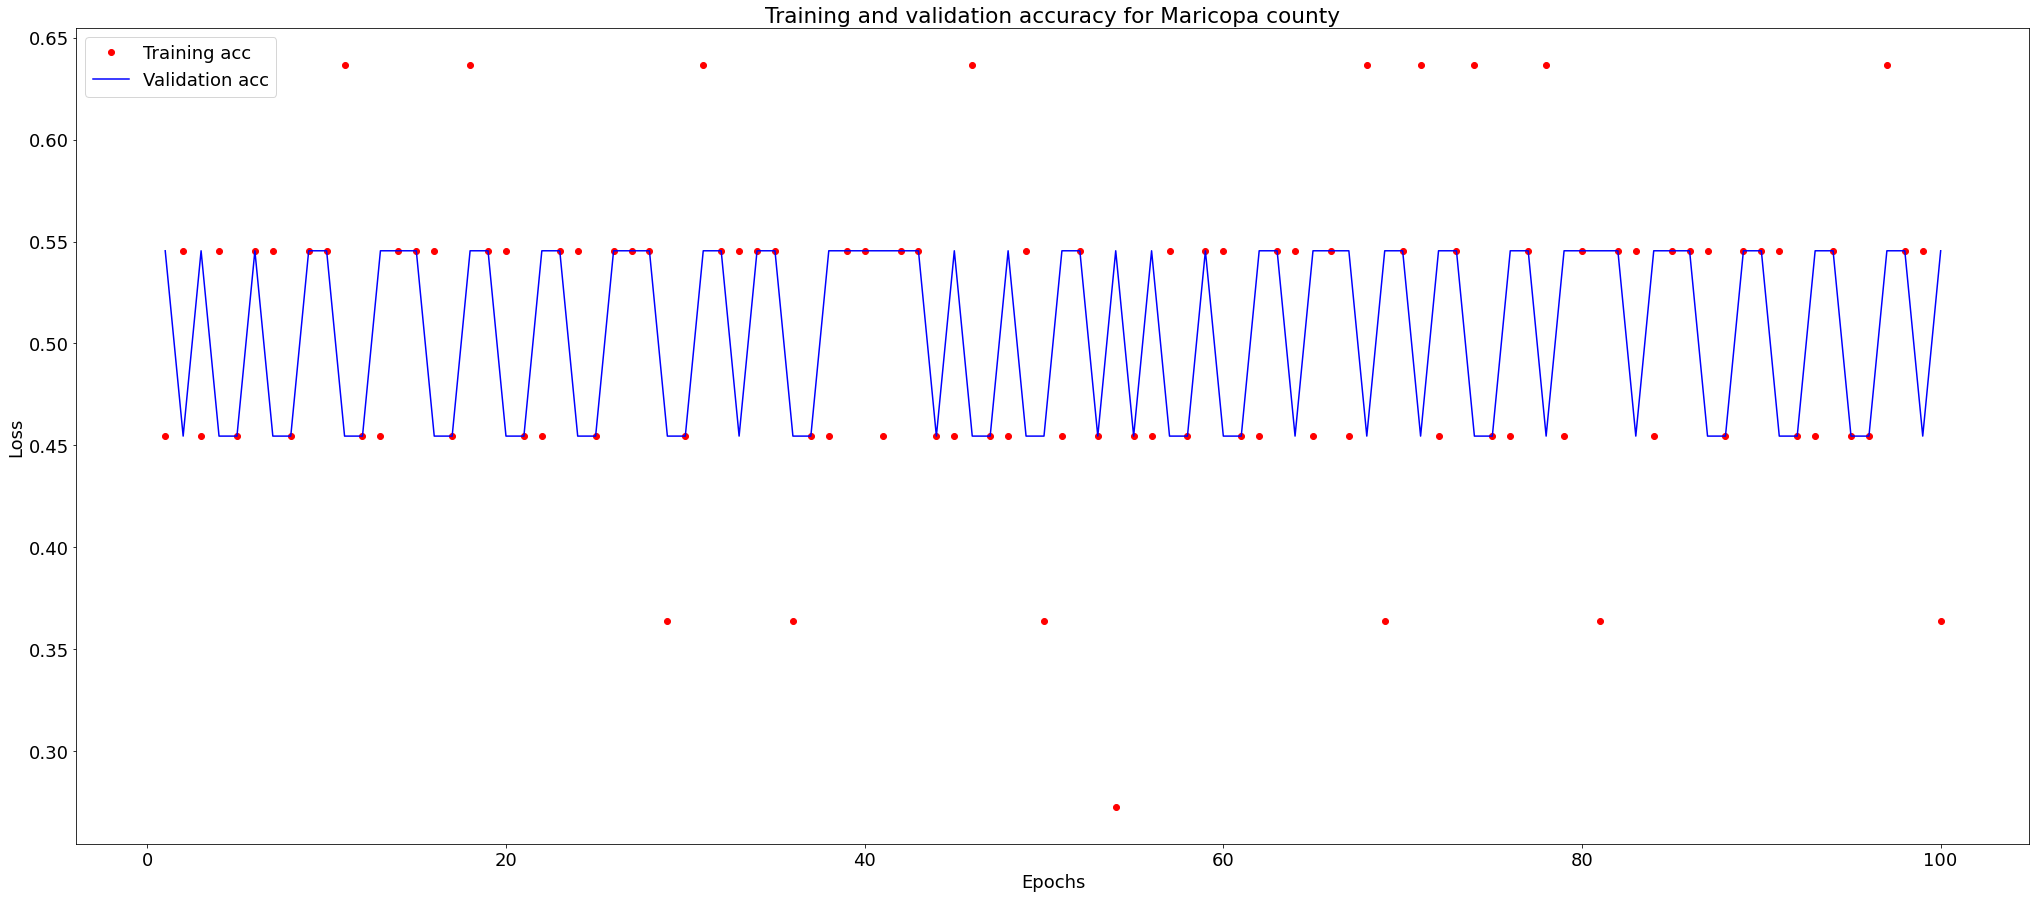

In [925]:
### Maricopa training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Maricopa county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [931]:
# Mohave county model
mohave = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/mohave.csv")

In [932]:
mohave['lake_havasu_city_hmi'] = pd.cut(mohave.lake_havasu_city_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])

In [933]:
mohave

,date,lake_havasu_city_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,11459,4936.4,156194,15.0,26588000
1,2001,0,11212,5221.6,159840,16.0,29325000
2,2002,0,11910,5489.4,165177,15.0,27522000
3,2003,0,13953,6344.7,171019,14.0,29325000
4,2004,0,15840,6308.2,178313,15.0,32768000
5,2005,1,16608,6145.2,185940,15.0,43663000
6,2006,1,17255,5580.1,192724,16.0,49790000
7,2007,1,16705,5384.3,195852,13.5,54301000
8,2008,1,15808,4336.3,195601,17.0,51325000
9,2009,0,15855,3984.7,194825,17.8,59585000


In [934]:
mohave['lake_havasu_city_hmi'] = mohave['lake_havasu_city_hmi'].astype(int)

In [935]:
# Get X and y
X = mohave.iloc[:, 2:].values
Y = mohave.lake_havasu_city_hmi.values

In [936]:
### Splitting training and test
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [937]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 200, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/200
3/3 - 0s - loss: 268.5089 - accuracy: 0.3636 - val_loss: 37.6272 - val_accuracy: 0.3636
Epoch 2/200
3/3 - 0s - loss: 426.3489 - accuracy: 0.3636 - val_loss: 43.1803 - val_accuracy: 0.3636
Epoch 3/200
3/3 - 0s - loss: 458.2391 - accuracy: 0.3636 - val_loss: 39.1639 - val_accuracy: 0.3636
Epoch 4/200
3/3 - 0s - loss: 398.9846 - accuracy: 0.3636 - val_loss: 28.1866 - val_accuracy: 0.3636
Epoch 5/200
3/3 - 0s - loss: 279.7783 - accuracy: 0.3636 - val_loss: 13.0893 - val_accuracy: 0.3636
Epoch 6/200
3/3 - 0s - loss: 99.6741 - accuracy: 0.3636 - val_loss: 2.4153 - val_accuracy: 0.6364
Epoch 7/200
3/3 - 0s - loss: 52.1332 - accuracy: 0.6364 - val_loss: 9.3439 - val_accuracy: 0.6364
Epoch 8/200
3/3 - 0s - loss: 146.5654 - accuracy: 0.6364 - val_loss: 12.4268 - val_accuracy: 0.6364
Epoch 9/200
3/3 - 0s - loss: 169.8300 - accuracy: 0.6364 - val_loss: 11.8389 - val_accuracy: 0.6364
Epoch 10/200
3/3 - 0s - loss: 156.8495 - accuracy: 0.6364 - val_loss: 9.4836 - val_accuracy: 0.6364
Epoc

Epoch 85/200
3/3 - 0s - loss: 0.8751 - accuracy: 0.7273 - val_loss: 0.6840 - val_accuracy: 0.6364
Epoch 86/200
3/3 - 0s - loss: 4.3451 - accuracy: 0.6364 - val_loss: 0.6884 - val_accuracy: 0.6364
Epoch 87/200
3/3 - 0s - loss: 1.4700 - accuracy: 0.6364 - val_loss: 1.0671 - val_accuracy: 0.3636
Epoch 88/200
3/3 - 0s - loss: 7.2633 - accuracy: 0.3636 - val_loss: 0.7090 - val_accuracy: 0.6364
Epoch 89/200
3/3 - 0s - loss: 4.0823 - accuracy: 0.6364 - val_loss: 1.4830 - val_accuracy: 0.3636
Epoch 90/200
3/3 - 0s - loss: 10.3248 - accuracy: 0.4545 - val_loss: 1.0810 - val_accuracy: 0.6364
Epoch 91/200
3/3 - 0s - loss: 14.5458 - accuracy: 0.6364 - val_loss: 0.9161 - val_accuracy: 0.6364
Epoch 92/200
3/3 - 0s - loss: 7.0828 - accuracy: 0.6364 - val_loss: 1.6227 - val_accuracy: 0.3636
Epoch 93/200
3/3 - 0s - loss: 15.1214 - accuracy: 0.2727 - val_loss: 0.8183 - val_accuracy: 0.3636
Epoch 94/200
3/3 - 0s - loss: 2.5453 - accuracy: 0.4545 - val_loss: 0.6483 - val_accuracy: 0.6364
Epoch 95/200
3/3 

Epoch 168/200
3/3 - 0s - loss: 15.4357 - accuracy: 0.4545 - val_loss: 1.9108 - val_accuracy: 0.3636
Epoch 169/200
3/3 - 0s - loss: 9.3290 - accuracy: 0.4545 - val_loss: 2.2636 - val_accuracy: 0.6364
Epoch 170/200
3/3 - 0s - loss: 34.7613 - accuracy: 0.6364 - val_loss: 2.5250 - val_accuracy: 0.6364
Epoch 171/200
3/3 - 0s - loss: 26.4154 - accuracy: 0.6364 - val_loss: 1.4877 - val_accuracy: 0.3636
Epoch 172/200
3/3 - 0s - loss: 25.8174 - accuracy: 0.3636 - val_loss: 1.6757 - val_accuracy: 0.3636
Epoch 173/200
3/3 - 0s - loss: 18.0882 - accuracy: 0.4545 - val_loss: 2.0883 - val_accuracy: 0.6364
Epoch 174/200
3/3 - 0s - loss: 27.9960 - accuracy: 0.6364 - val_loss: 0.7626 - val_accuracy: 0.6364
Epoch 175/200
3/3 - 0s - loss: 6.9176 - accuracy: 0.6364 - val_loss: 2.9270 - val_accuracy: 0.3636
Epoch 176/200
3/3 - 0s - loss: 25.5426 - accuracy: 0.3636 - val_loss: 1.4489 - val_accuracy: 0.6364
Epoch 177/200
3/3 - 0s - loss: 28.4174 - accuracy: 0.6364 - val_loss: 4.0055 - val_accuracy: 0.6364
Ep

In [938]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 36.36


In [939]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

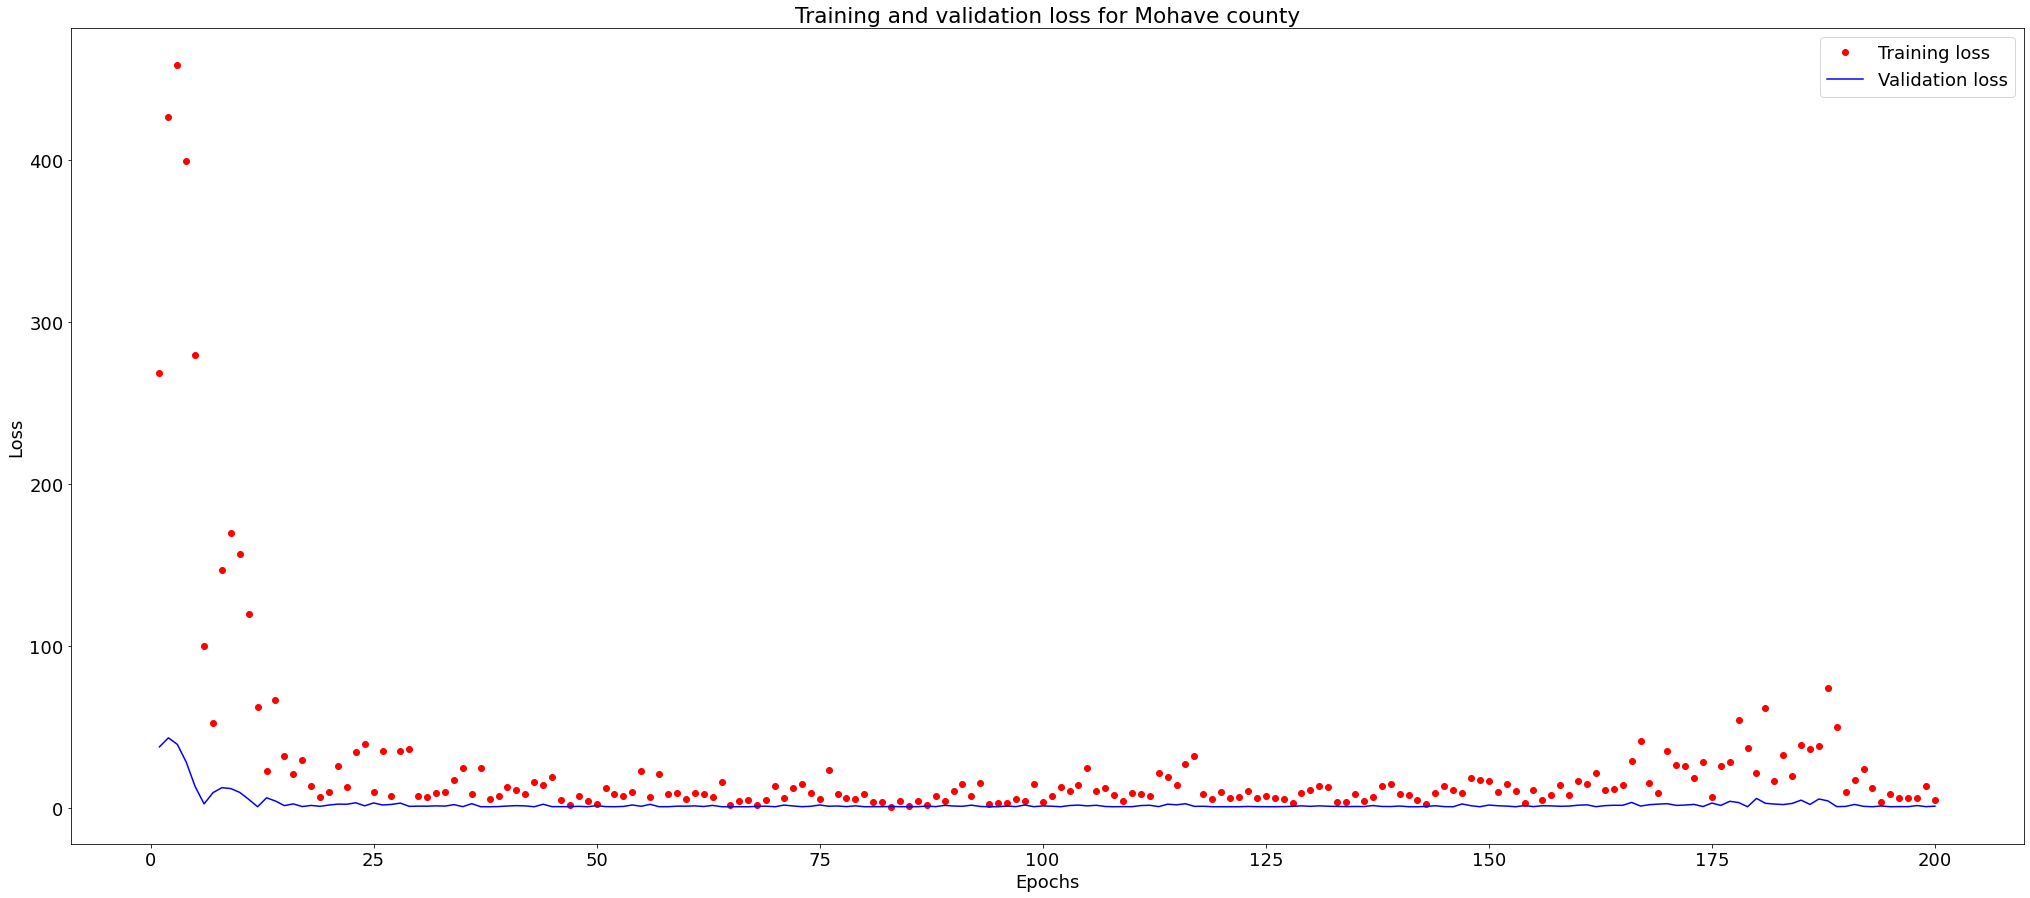

In [940]:
### Mohave training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Mohave county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

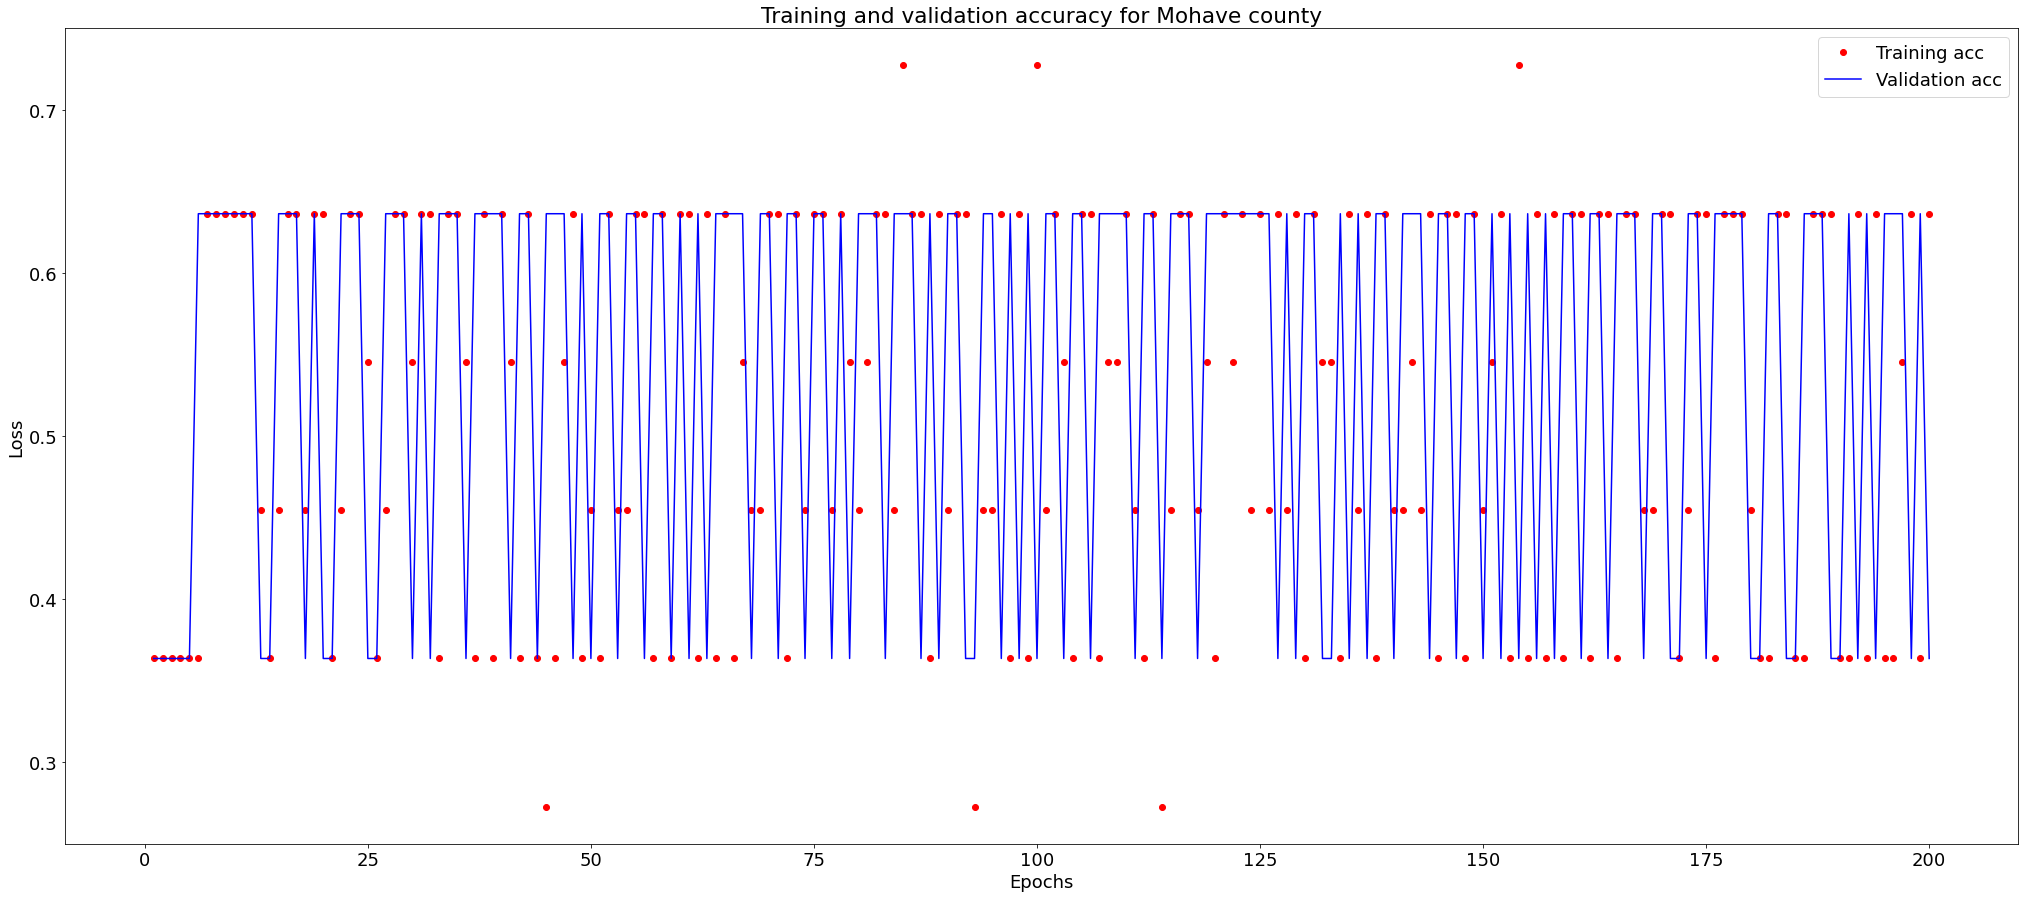

In [941]:
### Mohave training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Mohave county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [942]:
# Navajo county model
navajo = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/navajo.csv")

In [943]:
navajo['show_low_hmi'] = pd.cut(navajo.show_low_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])

In [944]:
navajo

,date,show_low_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,5893,3433.9,97876,24.0,4246000
1,2001,0,6019,3403.9,98549,24.0,12543000
2,2002,0,6116,3436.2,101358,24.0,13005000
3,2003,0,6021,3797.0,103220,21.0,12294000
4,2004,0,6609,3378.5,105020,23.0,17950000
5,2005,0,6365,3344.9,106968,28.0,12132000
6,2006,0,6612,2926.0,109000,24.4,17950000
7,2007,0,6890,2866.7,110999,23.4,12613000
8,2008,0,7490,3085.9,112348,23.0,17950000
9,2009,0,6771,3053.0,112975,27.4,10935000


In [945]:
navajo['show_low_hmi'] = navajo['show_low_hmi'].astype(int)

In [946]:
# Get X and y
X = navajo.iloc[:, 2:].values
Y = navajo.show_low_hmi.values

In [947]:
### Splitting training and test
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [957]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 200, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/200
3/3 - 0s - loss: 1.7894 - accuracy: 0.8182 - val_loss: 0.7372 - val_accuracy: 0.1818
Epoch 2/200
3/3 - 0s - loss: 0.8966 - accuracy: 0.2727 - val_loss: 0.4956 - val_accuracy: 0.8182
Epoch 3/200
3/3 - 0s - loss: 0.6000 - accuracy: 0.8182 - val_loss: 0.4700 - val_accuracy: 0.8182
Epoch 4/200
3/3 - 0s - loss: 0.9026 - accuracy: 0.8182 - val_loss: 0.5040 - val_accuracy: 0.8182
Epoch 5/200
3/3 - 0s - loss: 0.5698 - accuracy: 0.7273 - val_loss: 0.5739 - val_accuracy: 0.8182
Epoch 6/200
3/3 - 0s - loss: 0.6144 - accuracy: 0.8182 - val_loss: 0.4722 - val_accuracy: 0.8182
Epoch 7/200
3/3 - 0s - loss: 0.6936 - accuracy: 0.8182 - val_loss: 0.6483 - val_accuracy: 0.8182
Epoch 8/200
3/3 - 0s - loss: 0.6908 - accuracy: 0.5455 - val_loss: 0.5835 - val_accuracy: 0.8182
Epoch 9/200
3/3 - 0s - loss: 0.5047 - accuracy: 0.8182 - val_loss: 0.5762 - val_accuracy: 0.8182
Epoch 10/200
3/3 - 0s - loss: 0.7071 - accuracy: 0.4545 - val_loss: 0.4807 - val_accuracy: 0.8182
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 2.1082 - accuracy: 0.8182 - val_loss: 0.7712 - val_accuracy: 0.8182
Epoch 86/200
3/3 - 0s - loss: 2.2639 - accuracy: 0.8182 - val_loss: 0.5080 - val_accuracy: 0.8182
Epoch 87/200
3/3 - 0s - loss: 0.9741 - accuracy: 0.8182 - val_loss: 0.7760 - val_accuracy: 0.1818
Epoch 88/200
3/3 - 0s - loss: 0.8288 - accuracy: 0.5455 - val_loss: 0.4845 - val_accuracy: 0.8182
Epoch 89/200
3/3 - 0s - loss: 0.6036 - accuracy: 0.8182 - val_loss: 0.6000 - val_accuracy: 0.8182
Epoch 90/200
3/3 - 0s - loss: 0.5324 - accuracy: 0.8182 - val_loss: 0.5095 - val_accuracy: 0.8182
Epoch 91/200
3/3 - 0s - loss: 0.6978 - accuracy: 0.8182 - val_loss: 0.5286 - val_accuracy: 0.8182
Epoch 92/200
3/3 - 0s - loss: 0.4605 - accuracy: 0.8182 - val_loss: 0.7605 - val_accuracy: 0.1818
Epoch 93/200
3/3 - 0s - loss: 0.8655 - accuracy: 0.4545 - val_loss: 0.5229 - val_accuracy: 0.8182
Epoch 94/200
3/3 - 0s - loss: 0.5004 - accuracy: 0.8182 - val_loss: 0.5268 - val_accuracy: 0.8182
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.7482 - accuracy: 0.8182 - val_loss: 0.6178 - val_accuracy: 0.8182
Epoch 169/200
3/3 - 0s - loss: 1.9949 - accuracy: 0.8182 - val_loss: 0.5995 - val_accuracy: 0.8182
Epoch 170/200
3/3 - 0s - loss: 1.5907 - accuracy: 0.8182 - val_loss: 0.5140 - val_accuracy: 0.8182
Epoch 171/200
3/3 - 0s - loss: 1.0576 - accuracy: 0.3636 - val_loss: 0.4715 - val_accuracy: 0.8182
Epoch 172/200
3/3 - 0s - loss: 1.0531 - accuracy: 0.8182 - val_loss: 0.5124 - val_accuracy: 0.8182
Epoch 173/200
3/3 - 0s - loss: 1.1400 - accuracy: 0.8182 - val_loss: 0.7291 - val_accuracy: 0.1818
Epoch 174/200
3/3 - 0s - loss: 0.6820 - accuracy: 0.4545 - val_loss: 0.4724 - val_accuracy: 0.8182
Epoch 175/200
3/3 - 0s - loss: 0.7462 - accuracy: 0.8182 - val_loss: 0.4828 - val_accuracy: 0.8182
Epoch 176/200
3/3 - 0s - loss: 0.6119 - accuracy: 0.8182 - val_loss: 0.5409 - val_accuracy: 0.8182
Epoch 177/200
3/3 - 0s - loss: 0.6279 - accuracy: 0.8182 - val_loss: 0.6110 - val_accuracy: 0.8182
Epoch 178/

In [949]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 81.82


In [950]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

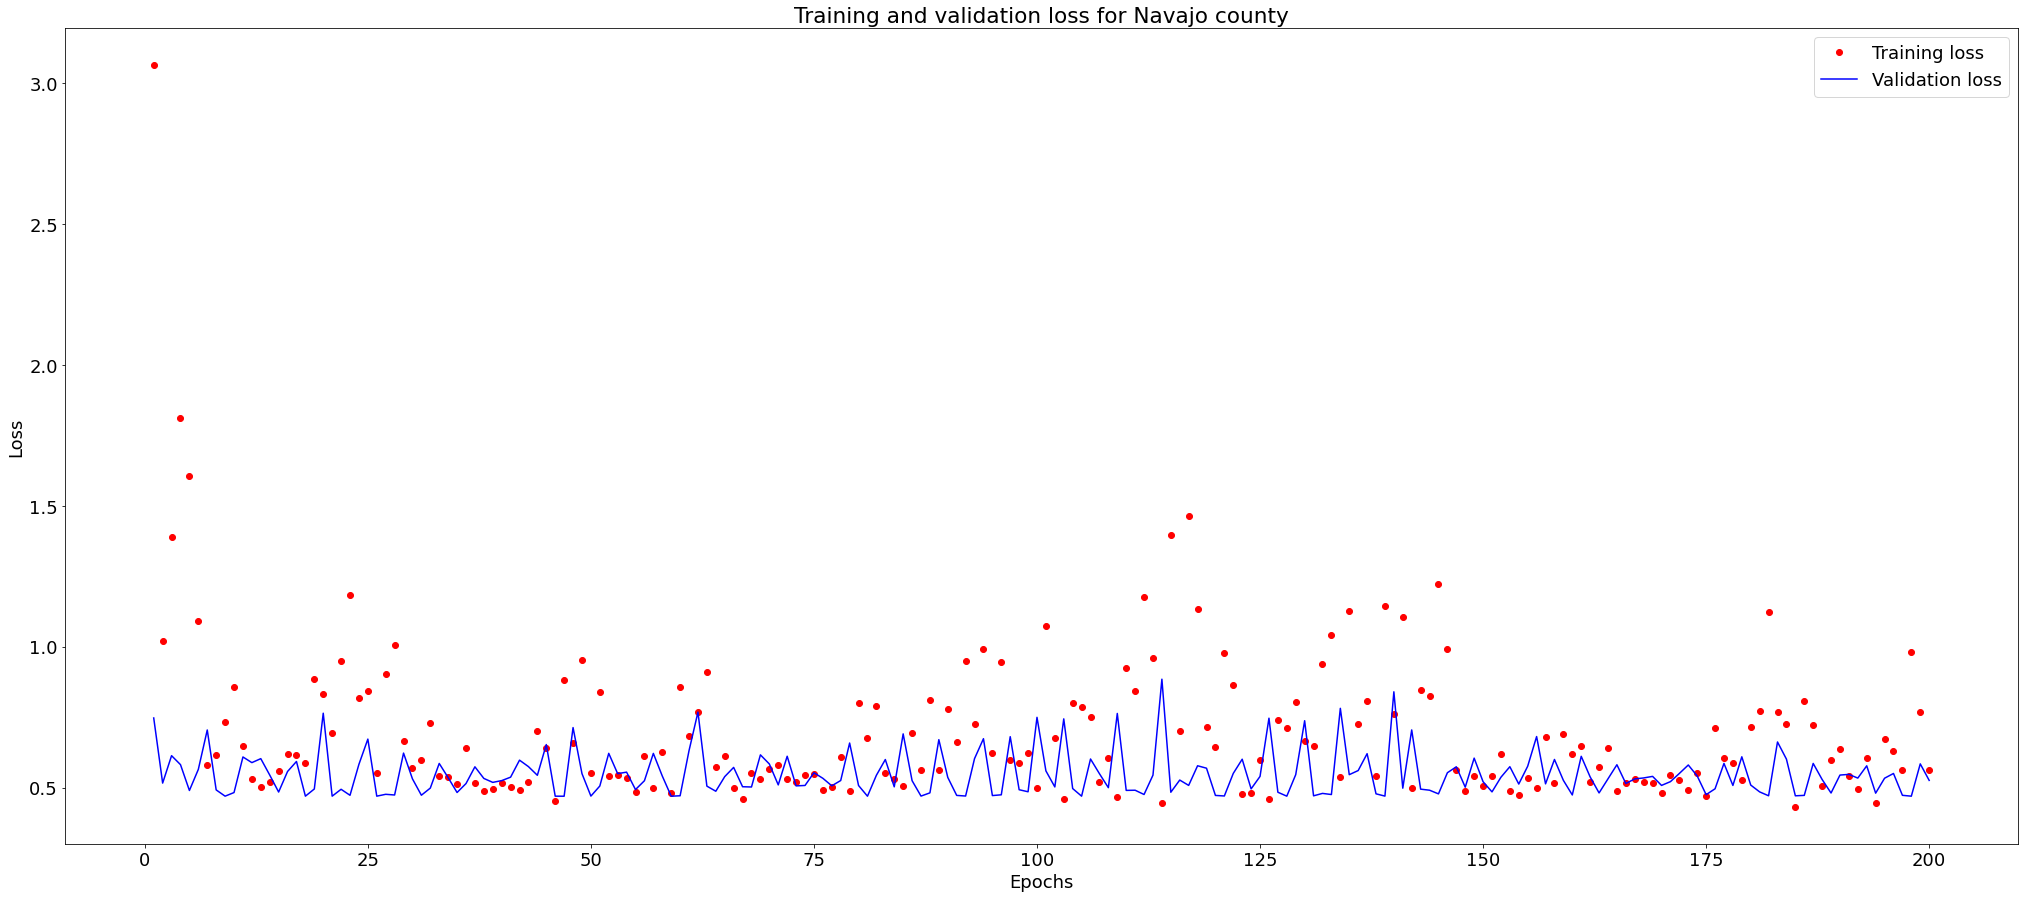

In [951]:
### Navajo training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Navajo county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

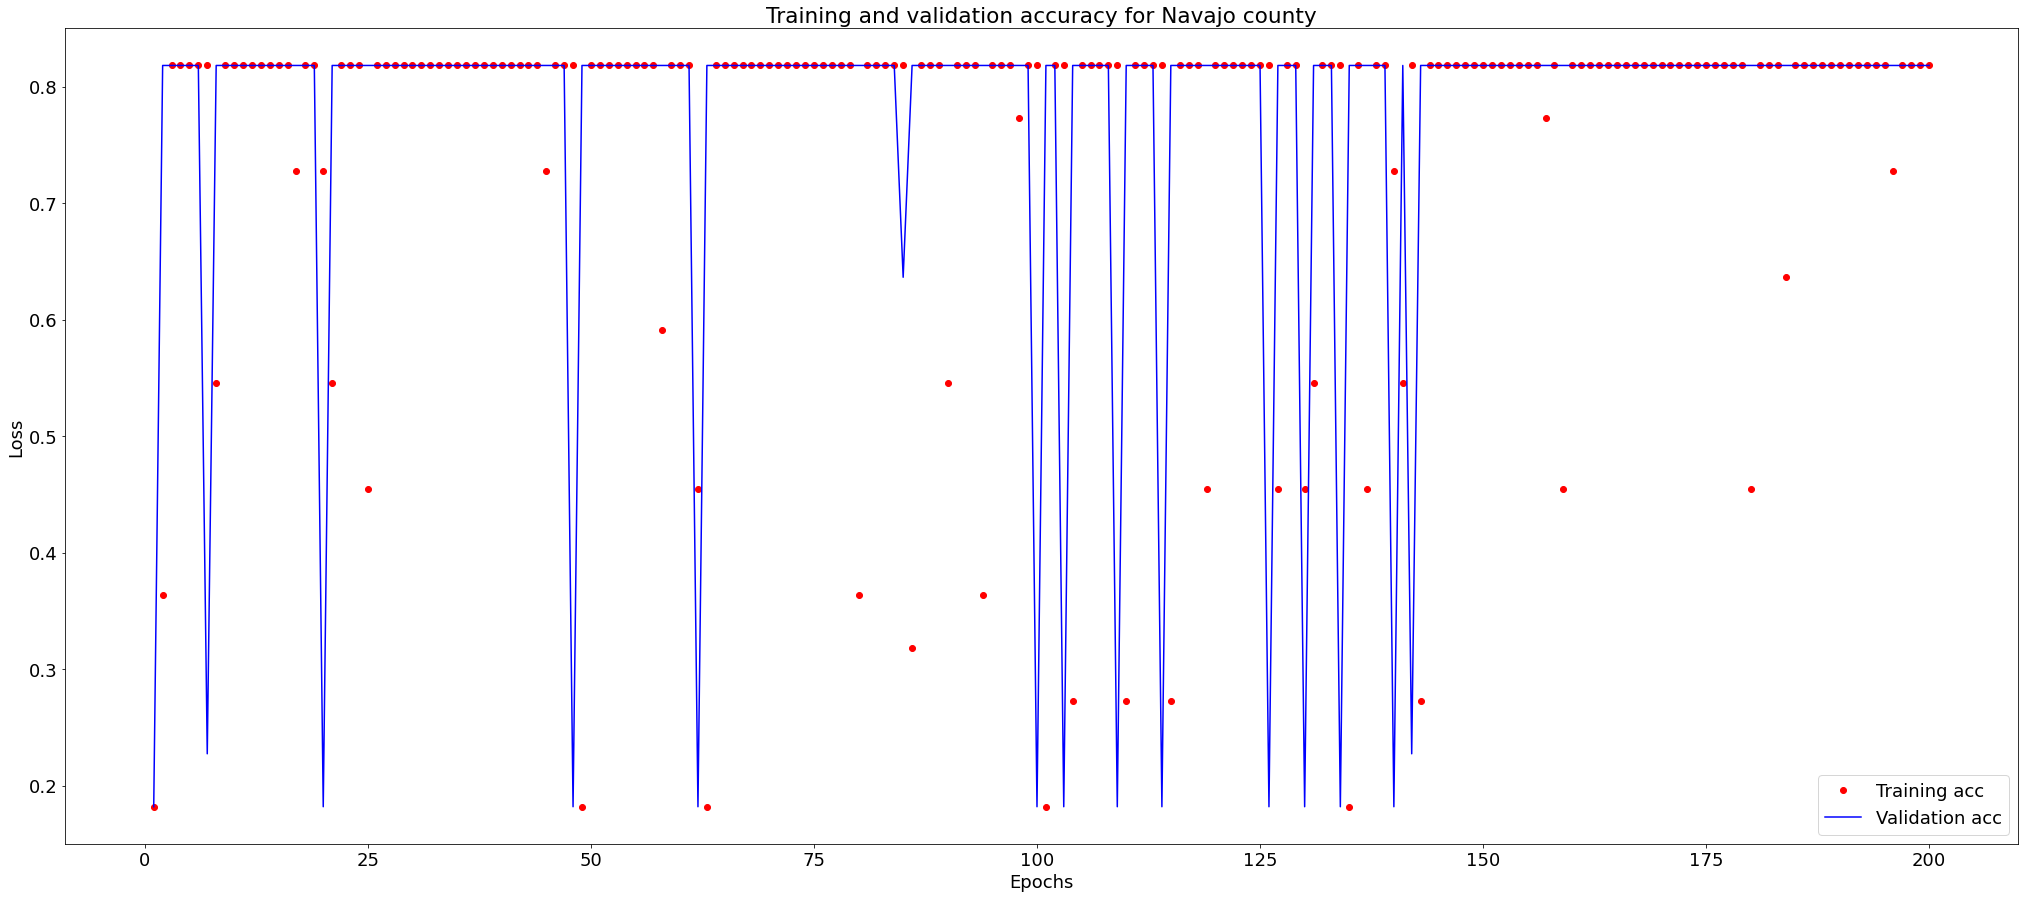

In [958]:
### Navajo training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Navajo county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [959]:
# Pima county model
pima = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/pima.csv")

In [960]:
pima['tucson_hmi'] = pd.cut(pima.tucson_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])

In [961]:
pima

,date,tucson_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,64739,7628.0,848521,13.0,237006000
1,2001,0,67030,8131.8,865694,13.0,300972000
2,2002,0,70134,8218.9,886063,14.0,244806000
3,2003,0,70399,8330.8,903320,14.0,258376000
4,2004,0,70070,8280.0,924205,15.0,279527000
5,2005,1,68340,6565.8,948965,14.0,300972000
6,2006,1,64130,4318.4,975476,15.3,321475000
7,2007,1,68849,4101.5,996593,14.9,423443000
8,2008,1,68105,3949.6,1009832,15.0,381861000
9,2009,0,68679,3843.9,1020200,18.9,396239000


In [962]:
pima['tucson_hmi'] = pima['tucson_hmi'].astype(int)

In [963]:
# Get X and y
X = pima.iloc[:, 2:].values
Y = pima.tucson_hmi.values

In [964]:
### Splitting training and test
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [965]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 500, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/500
3/3 - 0s - loss: 457.5796 - accuracy: 0.5455 - val_loss: 23.1268 - val_accuracy: 0.6364
Epoch 2/500
3/3 - 0s - loss: 4015.5837 - accuracy: 0.6364 - val_loss: 43.7688 - val_accuracy: 0.6364
Epoch 3/500
3/3 - 0s - loss: 3885.7930 - accuracy: 0.6364 - val_loss: 11.9258 - val_accuracy: 0.3636
Epoch 4/500
3/3 - 0s - loss: 1180.3541 - accuracy: 0.2727 - val_loss: 16.8444 - val_accuracy: 0.3636
Epoch 5/500
3/3 - 0s - loss: 1838.3551 - accuracy: 0.3636 - val_loss: 21.1969 - val_accuracy: 0.6364
Epoch 6/500
3/3 - 0s - loss: 3158.3943 - accuracy: 0.6364 - val_loss: 38.5661 - val_accuracy: 0.6364
Epoch 7/500
3/3 - 0s - loss: 3655.1409 - accuracy: 0.6364 - val_loss: 3.3581 - val_accuracy: 0.6364
Epoch 8/500
3/3 - 0s - loss: 1011.7328 - accuracy: 0.6364 - val_loss: 30.7708 - val_accuracy: 0.3636
Epoch 9/500
3/3 - 0s - loss: 1900.1355 - accuracy: 0.3636 - val_loss: 29.0629 - val_accuracy: 0.6364
Epoch 10/500
3/3 - 0s - loss: 3155.7905 - accuracy: 0.6364 - val_loss: 18.7040 - val_accuracy

Epoch 82/500
3/3 - 0s - loss: 1864.6655 - accuracy: 0.6364 - val_loss: 8.1153 - val_accuracy: 0.3636
Epoch 83/500
3/3 - 0s - loss: 1087.6886 - accuracy: 0.3636 - val_loss: 4.1110 - val_accuracy: 0.3636
Epoch 84/500
3/3 - 0s - loss: 686.1775 - accuracy: 0.5455 - val_loss: 15.1412 - val_accuracy: 0.6364
Epoch 85/500
3/3 - 0s - loss: 1349.5154 - accuracy: 0.6364 - val_loss: 8.8395 - val_accuracy: 0.3636
Epoch 86/500
3/3 - 0s - loss: 700.6461 - accuracy: 0.3636 - val_loss: 13.6327 - val_accuracy: 0.6364
Epoch 87/500
3/3 - 0s - loss: 2306.7549 - accuracy: 0.6364 - val_loss: 25.0951 - val_accuracy: 0.6364
Epoch 88/500
3/3 - 0s - loss: 2157.6377 - accuracy: 0.6364 - val_loss: 7.4459 - val_accuracy: 0.3636
Epoch 89/500
3/3 - 0s - loss: 1170.5750 - accuracy: 0.3636 - val_loss: 5.6301 - val_accuracy: 0.3636
Epoch 90/500
3/3 - 0s - loss: 909.5059 - accuracy: 0.4545 - val_loss: 12.9717 - val_accuracy: 0.6364
Epoch 91/500
3/3 - 0s - loss: 1194.8380 - accuracy: 0.5455 - val_loss: 5.9702 - val_accura

Epoch 163/500
3/3 - 0s - loss: 930.4011 - accuracy: 0.6364 - val_loss: 14.6138 - val_accuracy: 0.6364
Epoch 164/500
3/3 - 0s - loss: 1356.0782 - accuracy: 0.6364 - val_loss: 1.1791 - val_accuracy: 0.3636
Epoch 165/500
3/3 - 0s - loss: 651.6567 - accuracy: 0.3636 - val_loss: 8.5097 - val_accuracy: 0.3636
Epoch 166/500
3/3 - 0s - loss: 425.0381 - accuracy: 0.5455 - val_loss: 4.4102 - val_accuracy: 0.6364
Epoch 167/500
3/3 - 0s - loss: 371.2211 - accuracy: 0.6364 - val_loss: 7.8064 - val_accuracy: 0.3636
Epoch 168/500
3/3 - 0s - loss: 558.0742 - accuracy: 0.2727 - val_loss: 6.8441 - val_accuracy: 0.3636
Epoch 169/500
3/3 - 0s - loss: 786.2539 - accuracy: 0.3636 - val_loss: 5.9863 - val_accuracy: 0.6364
Epoch 170/500
3/3 - 0s - loss: 1192.0396 - accuracy: 0.6364 - val_loss: 14.6901 - val_accuracy: 0.6364
Epoch 171/500
3/3 - 0s - loss: 1329.1552 - accuracy: 0.6364 - val_loss: 4.1485 - val_accuracy: 0.3636
Epoch 172/500
3/3 - 0s - loss: 479.1678 - accuracy: 0.3636 - val_loss: 7.2556 - val_ac

Epoch 244/500
3/3 - 0s - loss: 456.0214 - accuracy: 0.6364 - val_loss: 8.3844 - val_accuracy: 0.3636
Epoch 245/500
3/3 - 0s - loss: 805.9824 - accuracy: 0.3636 - val_loss: 1.2474 - val_accuracy: 0.6364
Epoch 246/500
3/3 - 0s - loss: 157.1859 - accuracy: 0.6364 - val_loss: 3.2198 - val_accuracy: 0.3636
Epoch 247/500
3/3 - 0s - loss: 249.0823 - accuracy: 0.3636 - val_loss: 4.1823 - val_accuracy: 0.6364
Epoch 248/500
3/3 - 0s - loss: 300.6892 - accuracy: 0.6364 - val_loss: 16.0265 - val_accuracy: 0.3636
Epoch 249/500
3/3 - 0s - loss: 2074.5903 - accuracy: 0.3636 - val_loss: 21.6130 - val_accuracy: 0.3636
Epoch 250/500
3/3 - 0s - loss: 1240.6047 - accuracy: 0.3636 - val_loss: 10.7790 - val_accuracy: 0.6364
Epoch 251/500
3/3 - 0s - loss: 1433.0231 - accuracy: 0.6364 - val_loss: 12.7651 - val_accuracy: 0.6364
Epoch 252/500
3/3 - 0s - loss: 1036.7169 - accuracy: 0.6364 - val_loss: 11.1243 - val_accuracy: 0.3636
Epoch 253/500
3/3 - 0s - loss: 1460.0756 - accuracy: 0.3636 - val_loss: 10.0815 - 

Epoch 325/500
3/3 - 0s - loss: 395.3581 - accuracy: 0.6364 - val_loss: 3.5999 - val_accuracy: 0.6364
Epoch 326/500
3/3 - 0s - loss: 195.7081 - accuracy: 0.6364 - val_loss: 8.6156 - val_accuracy: 0.3636
Epoch 327/500
3/3 - 0s - loss: 572.8977 - accuracy: 0.3636 - val_loss: 4.1635 - val_accuracy: 0.6364
Epoch 328/500
3/3 - 0s - loss: 436.4878 - accuracy: 0.6364 - val_loss: 0.6701 - val_accuracy: 0.6364
Epoch 329/500
3/3 - 0s - loss: 308.9388 - accuracy: 0.5455 - val_loss: 0.7152 - val_accuracy: 0.3636
Epoch 330/500
3/3 - 0s - loss: 385.5466 - accuracy: 0.5455 - val_loss: 12.3057 - val_accuracy: 0.6364
Epoch 331/500
3/3 - 0s - loss: 1276.6440 - accuracy: 0.6364 - val_loss: 7.1802 - val_accuracy: 0.6364
Epoch 332/500
3/3 - 0s - loss: 628.5781 - accuracy: 0.5455 - val_loss: 8.0859 - val_accuracy: 0.3636
Epoch 333/500
3/3 - 0s - loss: 536.1755 - accuracy: 0.3636 - val_loss: 4.2037 - val_accuracy: 0.6364
Epoch 334/500
3/3 - 0s - loss: 389.8817 - accuracy: 0.6364 - val_loss: 3.3464 - val_accur

Epoch 406/500
3/3 - 0s - loss: 675.2802 - accuracy: 0.6364 - val_loss: 7.1044 - val_accuracy: 0.6364
Epoch 407/500
3/3 - 0s - loss: 543.8894 - accuracy: 0.6364 - val_loss: 7.9401 - val_accuracy: 0.3636
Epoch 408/500
3/3 - 0s - loss: 908.8607 - accuracy: 0.3636 - val_loss: 8.2719 - val_accuracy: 0.3636
Epoch 409/500
3/3 - 0s - loss: 352.0177 - accuracy: 0.4545 - val_loss: 10.3617 - val_accuracy: 0.6364
Epoch 410/500
3/3 - 0s - loss: 1328.4277 - accuracy: 0.6364 - val_loss: 14.3333 - val_accuracy: 0.6364
Epoch 411/500
3/3 - 0s - loss: 1320.5782 - accuracy: 0.6364 - val_loss: 3.6380 - val_accuracy: 0.6364
Epoch 412/500
3/3 - 0s - loss: 495.3177 - accuracy: 0.4545 - val_loss: 11.3920 - val_accuracy: 0.3636
Epoch 413/500
3/3 - 0s - loss: 763.1483 - accuracy: 0.3636 - val_loss: 1.8765 - val_accuracy: 0.6364
Epoch 414/500
3/3 - 0s - loss: 160.3504 - accuracy: 0.6364 - val_loss: 1.6318 - val_accuracy: 0.3636
Epoch 415/500
3/3 - 0s - loss: 130.4112 - accuracy: 0.4545 - val_loss: 2.8367 - val_ac

Epoch 488/500
3/3 - 0s - loss: 315.8724 - accuracy: 0.4545 - val_loss: 4.4944 - val_accuracy: 0.6364
Epoch 489/500
3/3 - 0s - loss: 395.0314 - accuracy: 0.6364 - val_loss: 3.8850 - val_accuracy: 0.3636
Epoch 490/500
3/3 - 0s - loss: 322.3342 - accuracy: 0.3636 - val_loss: 0.8135 - val_accuracy: 0.3636
Epoch 491/500
3/3 - 0s - loss: 159.3009 - accuracy: 0.4545 - val_loss: 1.1891 - val_accuracy: 0.6364
Epoch 492/500
3/3 - 0s - loss: 235.8842 - accuracy: 0.4545 - val_loss: 1.7312 - val_accuracy: 0.6364
Epoch 493/500
3/3 - 0s - loss: 299.4209 - accuracy: 0.6364 - val_loss: 2.9951 - val_accuracy: 0.6364
Epoch 494/500
3/3 - 0s - loss: 221.9253 - accuracy: 0.5455 - val_loss: 7.6930 - val_accuracy: 0.3636
Epoch 495/500
3/3 - 0s - loss: 487.1802 - accuracy: 0.3636 - val_loss: 6.7546 - val_accuracy: 0.6364
Epoch 496/500
3/3 - 0s - loss: 946.8002 - accuracy: 0.6364 - val_loss: 15.4058 - val_accuracy: 0.6364
Epoch 497/500
3/3 - 0s - loss: 1582.6353 - accuracy: 0.6364 - val_loss: 10.9370 - val_accu

In [966]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 63.64


In [967]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

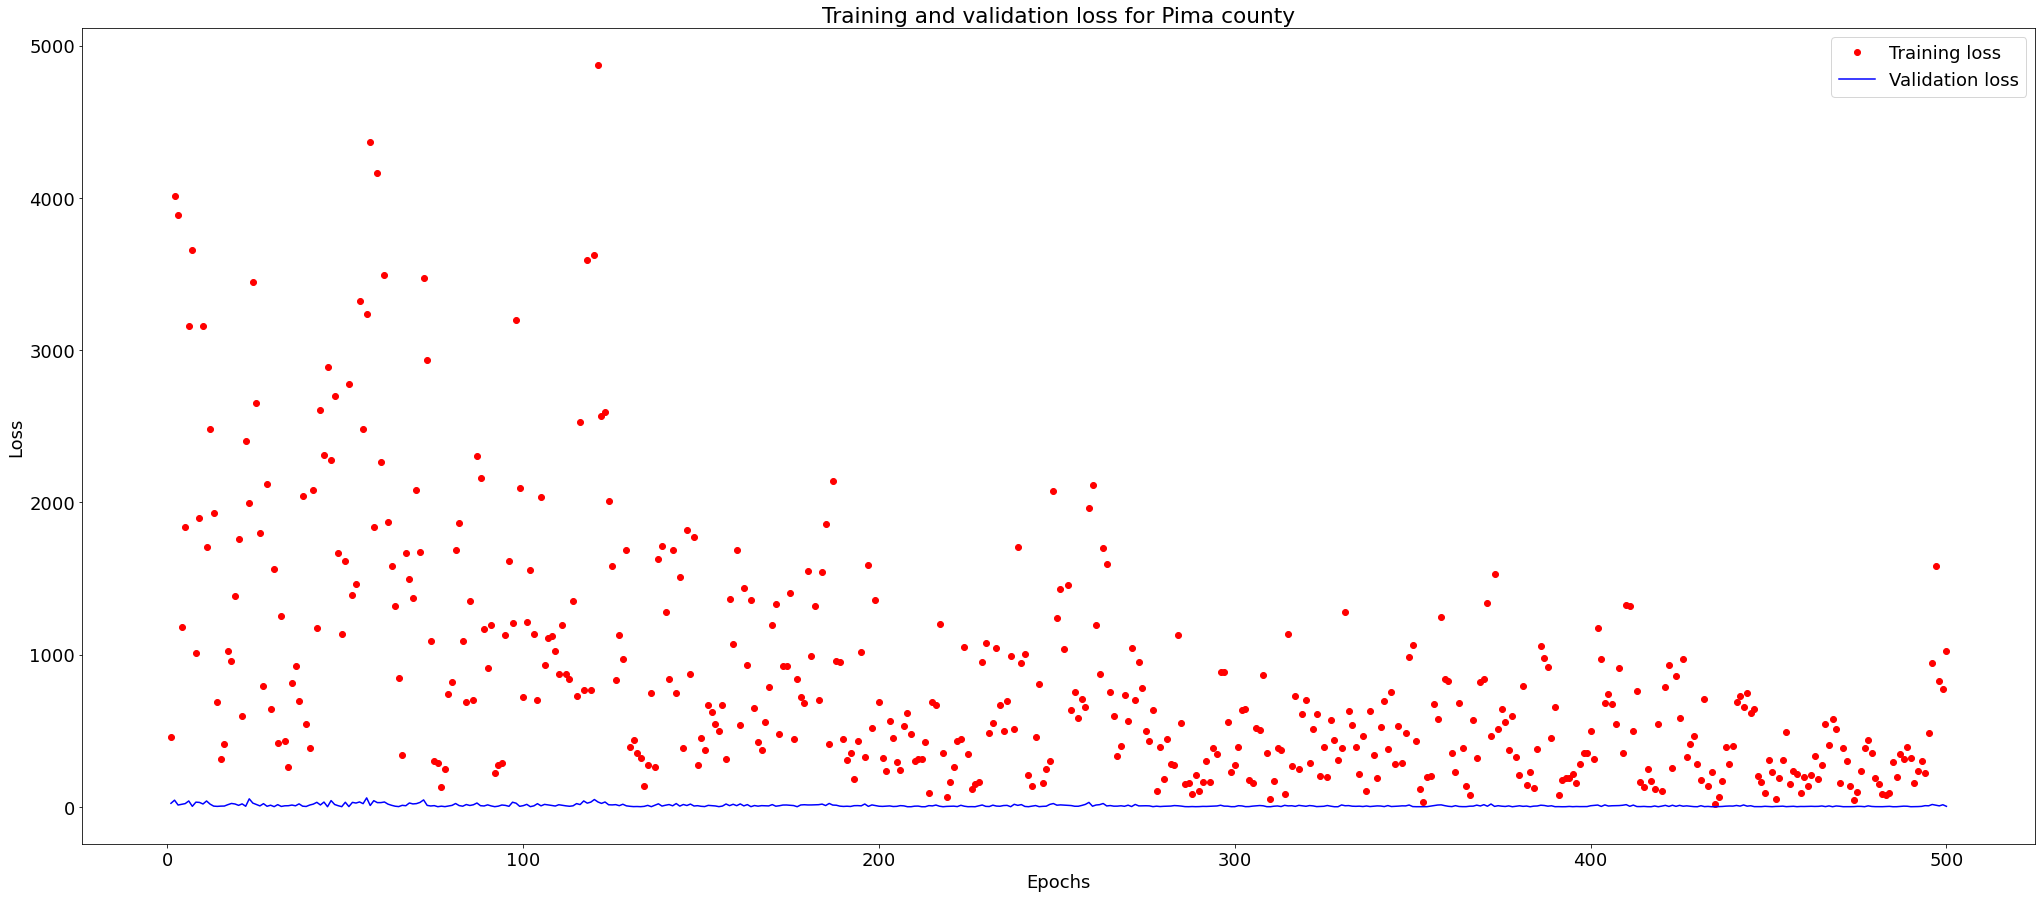

In [969]:
### Pima training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Pima county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

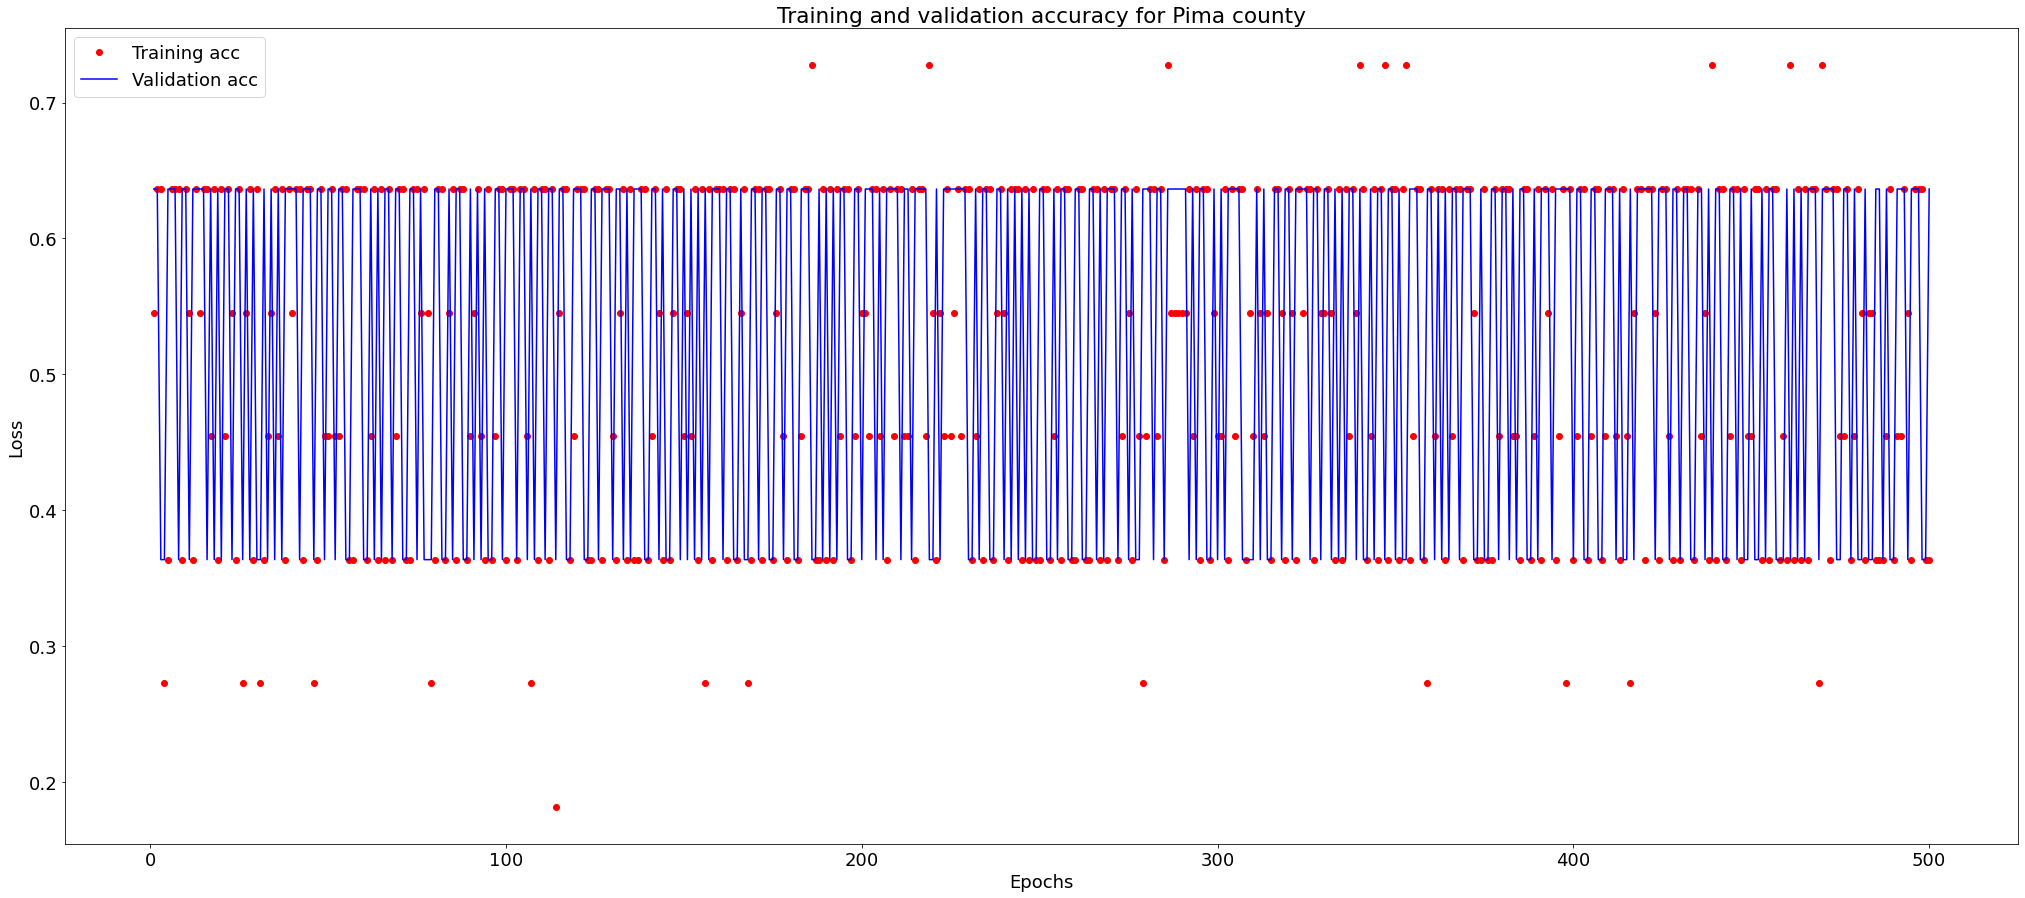

In [970]:
### Pima training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Pima county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [971]:
# Yavapai county model
yavapai = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/yavapai.csv")

In [972]:
yavapai['prescott_hmi'] = pd.cut(yavapai.prescott_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])

In [973]:
yavapai

,date,prescott_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,6746,4790.6,168886,12.0,28921000
1,2001,0,11993,4649.8,173285,13.0,28921000
2,2002,0,11478,4587.3,178390,12.0,32497000
3,2003,0,11082,4407.5,183400,12.0,36446000
4,2004,0,12031,4274.2,189532,12.0,41321000
5,2005,1,12769,3985.0,197533,12.0,45088000
6,2006,1,12927,3491.2,206672,12.4,50351000
7,2007,1,12856,3321.6,212004,12.6,56254000
8,2008,1,11863,3077.8,214930,13.0,45642000
9,2009,1,11908,2912.6,215686,14.2,50382000


In [974]:
yavapai['prescott_hmi'] = yavapai['prescott_hmi'].astype(int)

In [975]:
# Get X and y
X = yavapai.iloc[:, 2:].values
Y = yavapai.prescott_hmi.values

In [976]:
### Splitting training and test
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [977]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 500, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/500
3/3 - 0s - loss: 172.2913 - accuracy: 0.3182 - val_loss: 34.7875 - val_accuracy: 0.3182
Epoch 2/500
3/3 - 0s - loss: 477.3470 - accuracy: 0.3182 - val_loss: 50.2364 - val_accuracy: 0.3182
Epoch 3/500
3/3 - 0s - loss: 636.9924 - accuracy: 0.3182 - val_loss: 56.5362 - val_accuracy: 0.3182
Epoch 4/500
3/3 - 0s - loss: 694.0999 - accuracy: 0.3182 - val_loss: 55.7188 - val_accuracy: 0.3182
Epoch 5/500
3/3 - 0s - loss: 665.6035 - accuracy: 0.3182 - val_loss: 49.3130 - val_accuracy: 0.3182
Epoch 6/500
3/3 - 0s - loss: 575.3683 - accuracy: 0.3182 - val_loss: 38.5806 - val_accuracy: 0.3182
Epoch 7/500
3/3 - 0s - loss: 440.9467 - accuracy: 0.3182 - val_loss: 25.0572 - val_accuracy: 0.3182
Epoch 8/500
3/3 - 0s - loss: 268.3885 - accuracy: 0.3182 - val_loss: 10.4934 - val_accuracy: 0.3182
Epoch 9/500
3/3 - 0s - loss: 90.6926 - accuracy: 0.3182 - val_loss: 2.0139 - val_accuracy: 0.6818
Epoch 10/500
3/3 - 0s - loss: 27.8083 - accuracy: 0.6818 - val_loss: 6.6663 - val_accuracy: 0.6818
Epo

Epoch 85/500
3/3 - 0s - loss: 1.8833 - accuracy: 0.4091 - val_loss: 0.6336 - val_accuracy: 0.6818
Epoch 86/500
3/3 - 0s - loss: 4.5331 - accuracy: 0.6818 - val_loss: 0.6358 - val_accuracy: 0.6818
Epoch 87/500
3/3 - 0s - loss: 3.6746 - accuracy: 0.6818 - val_loss: 0.8372 - val_accuracy: 0.3182
Epoch 88/500
3/3 - 0s - loss: 2.4959 - accuracy: 0.4091 - val_loss: 0.6585 - val_accuracy: 0.6818
Epoch 89/500
3/3 - 0s - loss: 2.0536 - accuracy: 0.5000 - val_loss: 0.6118 - val_accuracy: 0.6818
Epoch 90/500
3/3 - 0s - loss: 2.7028 - accuracy: 0.6818 - val_loss: 0.6163 - val_accuracy: 0.6818
Epoch 91/500
3/3 - 0s - loss: 0.9998 - accuracy: 0.7727 - val_loss: 0.9739 - val_accuracy: 0.3182
Epoch 92/500
3/3 - 0s - loss: 4.9152 - accuracy: 0.3182 - val_loss: 0.7034 - val_accuracy: 0.6818
Epoch 93/500
3/3 - 0s - loss: 6.5603 - accuracy: 0.6818 - val_loss: 0.7005 - val_accuracy: 0.6818
Epoch 94/500
3/3 - 0s - loss: 4.4468 - accuracy: 0.6818 - val_loss: 1.0774 - val_accuracy: 0.3182
Epoch 95/500
3/3 - 0

Epoch 168/500
3/3 - 0s - loss: 10.5801 - accuracy: 0.6818 - val_loss: 0.6204 - val_accuracy: 0.6818
Epoch 169/500
3/3 - 0s - loss: 3.0148 - accuracy: 0.4091 - val_loss: 0.6525 - val_accuracy: 0.6818
Epoch 170/500
3/3 - 0s - loss: 1.2217 - accuracy: 0.6818 - val_loss: 0.6950 - val_accuracy: 0.4545
Epoch 171/500
3/3 - 0s - loss: 0.6500 - accuracy: 0.6818 - val_loss: 0.6672 - val_accuracy: 0.6818
Epoch 172/500
3/3 - 0s - loss: 0.8534 - accuracy: 0.6818 - val_loss: 0.7145 - val_accuracy: 0.3182
Epoch 173/500
3/3 - 0s - loss: 1.0669 - accuracy: 0.5000 - val_loss: 0.6329 - val_accuracy: 0.6818
Epoch 174/500
3/3 - 0s - loss: 1.5465 - accuracy: 0.6818 - val_loss: 0.6570 - val_accuracy: 0.6818
Epoch 175/500
3/3 - 0s - loss: 0.8032 - accuracy: 0.6818 - val_loss: 0.7016 - val_accuracy: 0.3182
Epoch 176/500
3/3 - 0s - loss: 0.6261 - accuracy: 0.6818 - val_loss: 0.8505 - val_accuracy: 0.3182
Epoch 177/500
3/3 - 0s - loss: 2.1457 - accuracy: 0.5000 - val_loss: 0.6184 - val_accuracy: 0.6818
Epoch 178

Epoch 251/500
3/3 - 0s - loss: 23.4638 - accuracy: 0.3182 - val_loss: 0.8150 - val_accuracy: 0.3182
Epoch 252/500
3/3 - 0s - loss: 9.1488 - accuracy: 0.4091 - val_loss: 2.2480 - val_accuracy: 0.6818
Epoch 253/500
3/3 - 0s - loss: 27.8605 - accuracy: 0.6818 - val_loss: 3.0718 - val_accuracy: 0.6818
Epoch 254/500
3/3 - 0s - loss: 32.0837 - accuracy: 0.6818 - val_loss: 2.2633 - val_accuracy: 0.6818
Epoch 255/500
3/3 - 0s - loss: 19.3042 - accuracy: 0.6818 - val_loss: 0.7102 - val_accuracy: 0.3182
Epoch 256/500
3/3 - 0s - loss: 12.1950 - accuracy: 0.4091 - val_loss: 1.3607 - val_accuracy: 0.3182
Epoch 257/500
3/3 - 0s - loss: 8.1230 - accuracy: 0.5000 - val_loss: 1.0787 - val_accuracy: 0.6818
Epoch 258/500
3/3 - 0s - loss: 13.5098 - accuracy: 0.6818 - val_loss: 1.1977 - val_accuracy: 0.6818
Epoch 259/500
3/3 - 0s - loss: 11.6825 - accuracy: 0.6818 - val_loss: 0.6242 - val_accuracy: 0.6818
Epoch 260/500
3/3 - 0s - loss: 2.5382 - accuracy: 0.5000 - val_loss: 0.7330 - val_accuracy: 0.3182
Epo

Epoch 334/500
3/3 - 0s - loss: 15.0108 - accuracy: 0.6818 - val_loss: 0.6195 - val_accuracy: 0.6818
Epoch 335/500
3/3 - 0s - loss: 7.7408 - accuracy: 0.5000 - val_loss: 0.7879 - val_accuracy: 0.3182
Epoch 336/500
3/3 - 0s - loss: 4.8526 - accuracy: 0.5909 - val_loss: 1.6477 - val_accuracy: 0.6818
Epoch 337/500
3/3 - 0s - loss: 17.9840 - accuracy: 0.6818 - val_loss: 1.7872 - val_accuracy: 0.6818
Epoch 338/500
3/3 - 0s - loss: 17.7977 - accuracy: 0.6818 - val_loss: 0.8875 - val_accuracy: 0.6818
Epoch 339/500
3/3 - 0s - loss: 5.4384 - accuracy: 0.6818 - val_loss: 1.0956 - val_accuracy: 0.3182
Epoch 340/500
3/3 - 0s - loss: 5.2117 - accuracy: 0.3182 - val_loss: 0.8649 - val_accuracy: 0.6818
Epoch 341/500
3/3 - 0s - loss: 8.9566 - accuracy: 0.6818 - val_loss: 0.8150 - val_accuracy: 0.6818
Epoch 342/500
3/3 - 0s - loss: 7.3219 - accuracy: 0.6818 - val_loss: 0.7569 - val_accuracy: 0.3182
Epoch 343/500
3/3 - 0s - loss: 0.9973 - accuracy: 0.4091 - val_loss: 0.6111 - val_accuracy: 0.6818
Epoch 3

Epoch 417/500
3/3 - 0s - loss: 8.0790 - accuracy: 0.6818 - val_loss: 0.8185 - val_accuracy: 0.3182
Epoch 418/500
3/3 - 0s - loss: 4.0253 - accuracy: 0.3182 - val_loss: 0.6137 - val_accuracy: 0.6818
Epoch 419/500
3/3 - 0s - loss: 2.6773 - accuracy: 0.6818 - val_loss: 0.8564 - val_accuracy: 0.3182
Epoch 420/500
3/3 - 0s - loss: 2.2602 - accuracy: 0.5909 - val_loss: 0.6122 - val_accuracy: 0.6818
Epoch 421/500
3/3 - 0s - loss: 2.0426 - accuracy: 0.6818 - val_loss: 0.7987 - val_accuracy: 0.3182
Epoch 422/500
3/3 - 0s - loss: 2.3199 - accuracy: 0.5909 - val_loss: 0.8319 - val_accuracy: 0.6818
Epoch 423/500
3/3 - 0s - loss: 7.9904 - accuracy: 0.6818 - val_loss: 0.6163 - val_accuracy: 0.6818
Epoch 424/500
3/3 - 0s - loss: 2.4994 - accuracy: 0.6818 - val_loss: 1.1420 - val_accuracy: 0.3182
Epoch 425/500
3/3 - 0s - loss: 4.7162 - accuracy: 0.5909 - val_loss: 0.6107 - val_accuracy: 0.6818
Epoch 426/500
3/3 - 0s - loss: 2.0363 - accuracy: 0.6818 - val_loss: 0.9962 - val_accuracy: 0.3182
Epoch 427/

Epoch 500/500
3/3 - 0s - loss: 17.9457 - accuracy: 0.6818 - val_loss: 0.6172 - val_accuracy: 0.6818


In [848]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 77.27


In [978]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

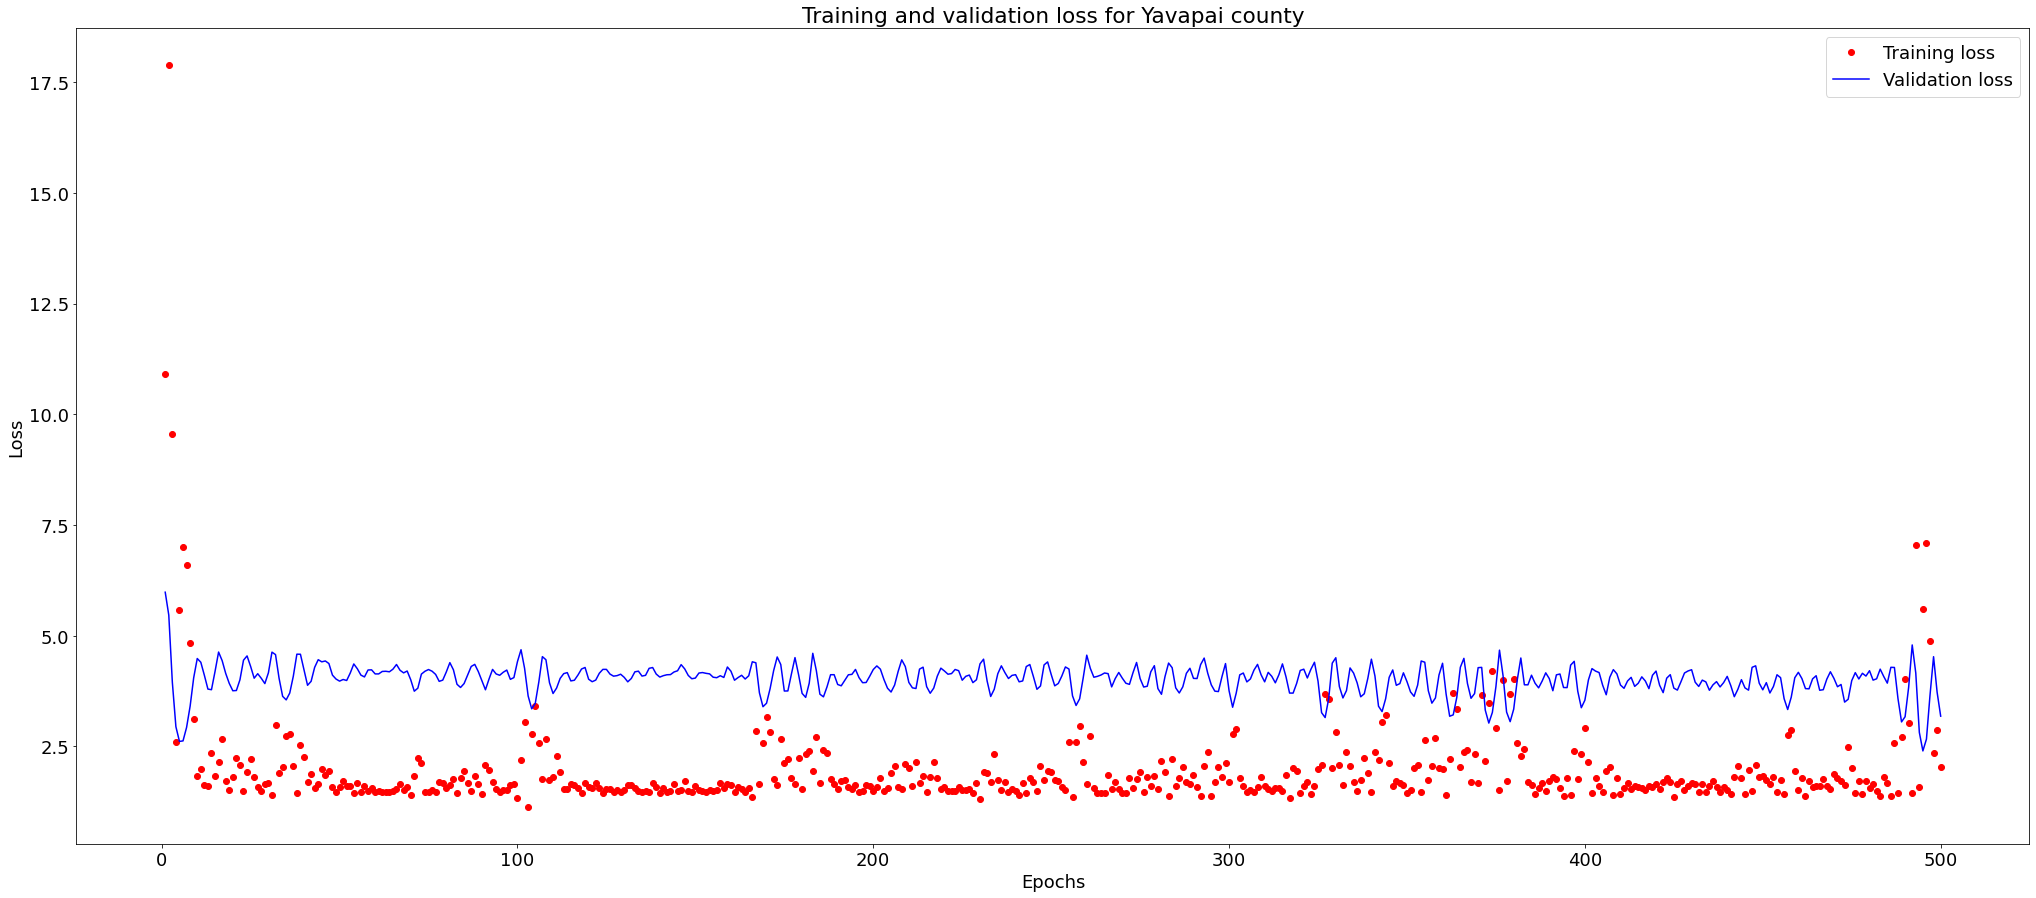

In [850]:
### Yavapai training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Yavapai county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 25, 15
plt.rcParams.update({'font.size': 18})
plt.show()

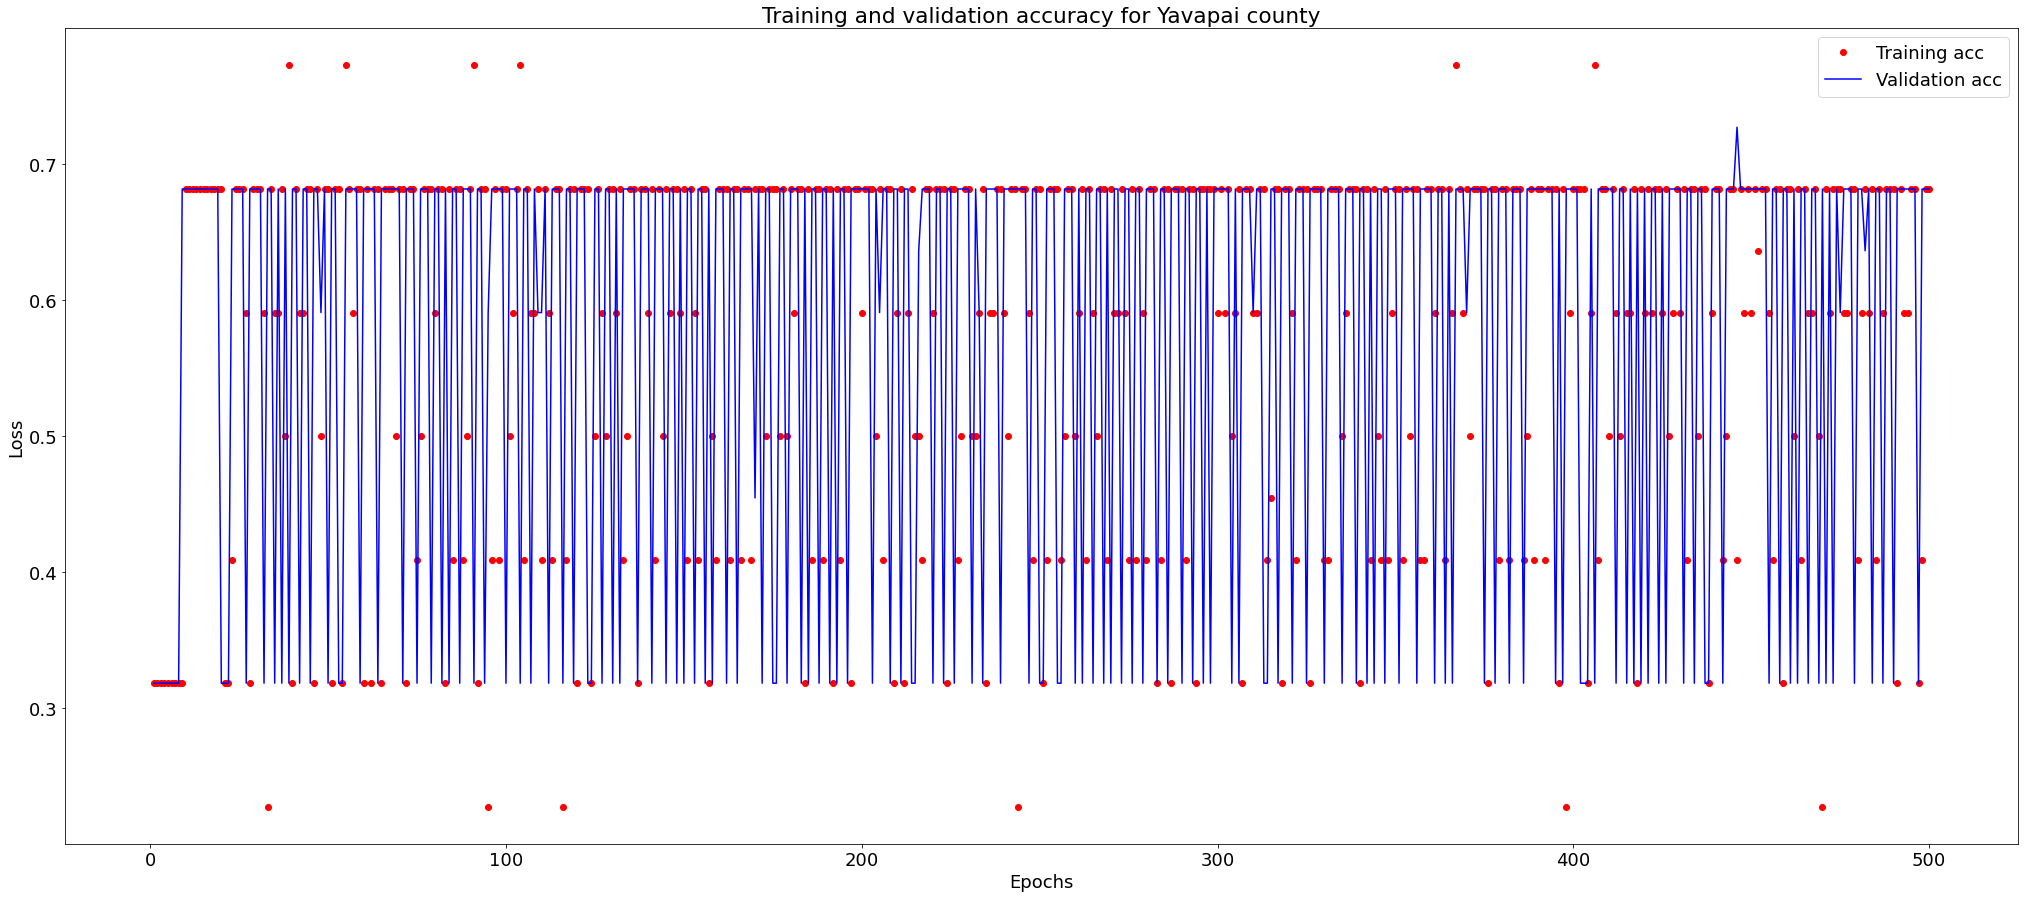

In [979]:
### Yavapai training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Yavapai county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()